In [6]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

## Load and Process Data

In [7]:
file_names = ['modified_gdp_per_county.csv', 'modified_homeowner_per_county.csv', 'modified_income_inequality_per_county.csv',
'modified_mean_commutetime_per_county.csv', 'modified_median_income_per_county.csv', 'modified_population_under_poverty_per_county.csv',
'modified_resident_population_per_county.csv', 'modified_totallisting_per_county.csv', 'modified_unemployment_per_county.csv']
data_path = './Input_Data/'

In [8]:
final_datesets = []
for file in file_names:
    df_name = file.replace('.csv', '')
    globals()[df_name] = pd.read_csv(data_path+file)
    final_datesets.append(df_name)


In [9]:
final_datesets

['modified_gdp_per_county',
 'modified_homeowner_per_county',
 'modified_income_inequality_per_county',
 'modified_mean_commutetime_per_county',
 'modified_median_income_per_county',
 'modified_population_under_poverty_per_county',
 'modified_resident_population_per_county',
 'modified_totallisting_per_county',
 'modified_unemployment_per_county']

#### Look at how each file looks like and what columns are available

In [10]:
print(modified_gdp_per_county.columns)
modified_gdp_per_county.head(2)

Index(['index', 'RegionName', 'RegionType', 'CountyName', 'StateName',
       'StateCodeFIPS', 'county_fips', 'State', '1/1/17', '1/1/18', '1/1/19',
       '1/1/20', '1/1/21', '1/1/22'],
      dtype='object')


,index,RegionName,RegionType,CountyName,StateName,StateCodeFIPS,county_fips,State,1/1/17,1/1/18,1/1/19,1/1/20,1/1/21,1/1/22
0,Gross Domestic Product: All Industries in Phil...,"Philadelphia County, PA",county,Philadelphia,PA,42,42101,PA,108863224,110895144,112625135,107609051,114416856,123064986
1,Gross Domestic Product: All Industries in Oran...,"Orange County, CA",county,Orange,CA,6,6059,CA,244438165,256068837,269080278,268778347,294339604,314177082


In [11]:
print(modified_homeowner_per_county.columns)
modified_homeowner_per_county.head(2)

Index(['Attribute', 'RegionName', 'RegionType', 'CountyName', 'StateName',
       'State', 'StateCodeFIPS', 'county_fips', '1/1/17', '1/1/18', '1/1/19',
       '1/1/20', '1/1/21', '1/1/22'],
      dtype='object')


,Attribute,RegionName,RegionType,CountyName,StateName,State,StateCodeFIPS,county_fips,1/1/17,1/1/18,1/1/19,1/1/20,1/1/21,1/1/22
0,Homeownership Rate (5-year estimate) for Los A...,Los Angeles County,county,Los Angeles,CA,CA,6,6037,48.613636,48.629000,48.719108,49.172646,49.501119,49.697792
1,Homeownership Rate (5-year estimate) for San F...,San Francisco County/city,county,San Francisco,CA,CA,6,6075,43.385844,43.741731,43.614863,43.815168,43.871227,44.440457


In [12]:
print(modified_income_inequality_per_county.columns)
modified_income_inequality_per_county.head(2)

Index(['index', 'index.1', 'RegionName', 'RegionType', 'CountyName',
       'StateName', 'StateCodeFIPS', 'county_fips', 'State', '1/1/17',
       '1/1/18', '1/1/19', '1/1/20', '1/1/21', '1/1/22'],
      dtype='object')


,index,index.1,RegionName,RegionType,CountyName,StateName,StateCodeFIPS,county_fips,State,1/1/17,1/1/18,1/1/19,1/1/20,1/1/21,1/1/22
0,"Income Inequality in Los Angeles County, CA","Income Inequality in Los Angeles County, CA",Los Angeles County,county,Los Angeles,CA,6,6037,CA,18.899063,18.947459,18.914089,18.971363,19.153770,19.515982
1,"Income Inequality in New York County, NY","Income Inequality in New York County, NY",New York County,county,New York,NY,36,36000,NY,43.035232,43.119567,43.802893,44.935319,45.670906,46.870002


In [13]:
print(modified_mean_commutetime_per_county.columns)
modified_mean_commutetime_per_county.head(2)

Index(['index', 'RegionName', 'RegionType', 'CountyName', 'StateName',
       'StateCodeFIPS', 'county_fips', 'State', '1/1/17', '1/1/18', '1/1/19',
       '1/1/20', '1/1/21', '1/1/22'],
      dtype='object')


,index,RegionName,RegionType,CountyName,StateName,StateCodeFIPS,county_fips,State,1/1/17,1/1/18,1/1/19,1/1/20,1/1/21,1/1/22
0,Mean Commuting Time for Workers (5-year estima...,Los Angeles County,county,Los Angeles,CA,6,6037,CA,30.877163,31.299032,31.844204,31.747460,31.373927,30.999346
1,Mean Commuting Time for Workers (5-year estima...,New York County,county,New York,NY,36,36000,NY,31.807188,32.060998,32.212711,32.101121,32.050289,31.841498


In [14]:
print(modified_median_income_per_county.columns)
modified_median_income_per_county.head(2)

Index(['Attribute', 'RegionName', 'RegionType', 'CountyName', 'StateName',
       'State', 'StateCodeFIPS', 'county_fips', '1/1/17', '1/1/18', '1/1/19',
       '1/1/20', '1/1/21', '1/1/22'],
      dtype='object')


,Attribute,RegionName,RegionType,CountyName,StateName,State,StateCodeFIPS,county_fips,1/1/17,1/1/18,1/1/19,1/1/20,1/1/21,1/1/22
0,Estimate of Median Household Income for Los An...,Los Angeles County,county,Los Angeles,CA,CA,6,6037,64912,67986,72721,75624,77356,82455
1,Estimate of Median Household Income for San Di...,San Diego County,county,San Diego,CA,CA,6,6073,76048,78777,83576,87126,90756,98365


In [15]:
print(modified_population_under_poverty_per_county.columns)
modified_median_income_per_county.head(2)

Index(['index', 'RegionName', 'RegionType', 'CountyName', 'StateName', 'State',
       'StateCodeFIPS', 'county_fips', '1/1/17', '1/1/18', '1/1/19', '1/1/20',
       '1/1/21', '1/1/22'],
      dtype='object')


,Attribute,RegionName,RegionType,CountyName,StateName,State,StateCodeFIPS,county_fips,1/1/17,1/1/18,1/1/19,1/1/20,1/1/21,1/1/22
0,Estimate of Median Household Income for Los An...,Los Angeles County,county,Los Angeles,CA,CA,6,6037,64912,67986,72721,75624,77356,82455
1,Estimate of Median Household Income for San Di...,San Diego County,county,San Diego,CA,CA,6,6073,76048,78777,83576,87126,90756,98365


In [16]:
print(modified_resident_population_per_county.columns)
modified_resident_population_per_county.head(2)

Index(['index', 'RegionName', 'RegionType', 'CountyName', 'StateName',
       'StateCodeFIPS', 'county_fips', 'State', '1/1/17', '1/1/18', '1/1/19',
       '1/1/20', '1/1/21', '1/1/22', '1/1/23'],
      dtype='object')


,index,RegionName,RegionType,CountyName,StateName,StateCodeFIPS,county_fips,State,1/1/17,1/1/18,1/1/19,1/1/20,1/1/21,1/1/22,1/1/23
0,Resident Population in San Francisco County/ci...,San Francisco County,county,San Francisco,CA,6,6075,CA,877.471,879.676,878.826,870.518,811.935,807.774,808.988
1,"Resident Population in Los Angeles County, CA",Los Angeles County,county,Los Angeles,CA,6,6037,CA,10092.365,10061.533,10011.602,9992.813,9809.462,9719.765,9663.345


In [17]:
print(modified_totallisting_per_county.columns)
modified_totallisting_per_county.head(2)

Index(['index', 'RegionName', 'RegionType', 'CountyName', 'StateName',
       'StateCodeFIPS', 'county_fips', 'State', '7/1/16', '8/1/16', '9/1/16',
       '10/1/16', '11/1/16', '12/1/16', '1/1/17', '2/1/17', '3/1/17', '4/1/17',
       '5/1/17', '6/1/17', '7/1/17', '8/1/17', '9/1/17', '10/1/17', '11/1/17',
       '12/1/17', '1/1/18', '2/1/18', '3/1/18', '4/1/18', '5/1/18', '6/1/18',
       '7/1/18', '8/1/18', '9/1/18', '10/1/18', '11/1/18', '12/1/18', '1/1/19',
       '2/1/19', '3/1/19', '4/1/19', '5/1/19', '6/1/19', '7/1/19', '8/1/19',
       '9/1/19', '10/1/19', '11/1/19', '12/1/19', '1/1/20', '2/1/20', '3/1/20',
       '4/1/20', '5/1/20', '6/1/20', '7/1/20', '8/1/20', '9/1/20', '10/1/20',
       '11/1/20', '12/1/20', '1/1/21', '2/1/21', '3/1/21', '4/1/21', '5/1/21',
       '6/1/21', '7/1/21', '8/1/21', '9/1/21', '10/1/21', '11/1/21', '12/1/21',
       '1/1/22', '2/1/22', '3/1/22', '4/1/22', '5/1/22', '6/1/22', '7/1/22',
       '8/1/22', '9/1/22', '10/1/22', '11/1/22', '12/1/22', '1/

,index,RegionName,RegionType,CountyName,StateName,StateCodeFIPS,county_fips,State,7/1/16,8/1/16,...,3/1/23,4/1/23,5/1/23,6/1/23,7/1/23,8/1/23,9/1/23,10/1/23,11/1/23,12/1/23
0,Housing Inventory: Total Listing Count in Sacr...,"Sacramento County, CA",county,Sacramento,CA,6,6067,CA,5800,6038,...,2106,2099,2227,2277,2334,2383,2346,2325,2288,2061
1,Housing Inventory: Total Listing Count in Pine...,"Pinellas County, FL",county,Pinellas,FL,12,12103,FL,8666,8599,...,5520,5543,5481,5347,5270,5224,5314,5872,6289,6343


In [18]:
print(modified_unemployment_per_county.columns)
print(modified_unemployment_per_county.shape)
modified_unemployment_per_county.head(2)

Index(['index', 'RegionName', 'CountyName', 'RegionType', 'StateName', 'State',
       'StateCodeFIPS', 'county_fips', '1/1/17', '2/1/17', '3/1/17', '4/1/17',
       '5/1/17', '6/1/17', '7/1/17', '8/1/17', '9/1/17', '10/1/17', '11/1/17',
       '12/1/17', '1/1/18', '2/1/18', '3/1/18', '4/1/18', '5/1/18', '6/1/18',
       '7/1/18', '8/1/18', '9/1/18', '10/1/18', '11/1/18', '12/1/18', '1/1/19',
       '2/1/19', '3/1/19', '4/1/19', '5/1/19', '6/1/19', '7/1/19', '8/1/19',
       '9/1/19', '10/1/19', '11/1/19', '12/1/19', '1/1/20', '2/1/20', '3/1/20',
       '4/1/20', '5/1/20', '6/1/20', '7/1/20', '8/1/20', '9/1/20', '10/1/20',
       '11/1/20', '12/1/20', '1/1/21', '2/1/21', '3/1/21', '4/1/21', '5/1/21',
       '6/1/21', '7/1/21', '8/1/21', '9/1/21', '10/1/21', '11/1/21', '12/1/21',
       '1/1/22', '2/1/22', '3/1/22', '4/1/22', '5/1/22', '6/1/22', '7/1/22',
       '8/1/22', '9/1/22', '10/1/22', '11/1/22', '12/1/22', '1/1/23', '2/1/23',
       '3/1/23', '4/1/23', '5/1/23', '6/1/23', '7/1/2

,index,RegionName,CountyName,RegionType,StateName,State,StateCodeFIPS,county_fips,1/1/17,2/1/17,...,3/1/23,4/1/23,5/1/23,6/1/23,7/1/23,8/1/23,9/1/23,10/1/23,11/1/23,12/1/23
0,"Unemployment Rate in Alachua County, FL",Alachua County,Alachua,county,FL,FL,12,12001,4.5,3.9,...,2.7,2.5,2.9,3.4,3.4,3.5,3.2,3.5,3.3,3.1
1,"Unemployment Rate in Alameda County, CA",Alameda County,Alameda,county,CA,CA,6,6001,4.3,4.0,...,3.7,3.3,3.5,4.1,4.2,4.6,4.4,4.6,4.5,4.5


In [19]:
# Limited county data
modified_unemployment_per_county.RegionName.unique()

array(['Alachua County', 'Alameda County', 'Albany County',
       'Allegheny County', 'Arlington County', 'Austin County',
       'Bartow County', 'Bergen County', 'Bexar County', 'Brevard County',
       'Bronx County', 'Broward County', 'Cache County',
       'Chesterfield County', 'Clark County', 'Cook County',
       'Cuyahoga County', 'Dallas County', 'Dane County',
       'Davidson County', 'Denton County', 'Denver County/City',
       'Duval County', 'Elkhart County', 'Erie County', 'Essex County',
       'Fairfax County', 'Fairfield County', 'Franklin County',
       'Frederick County', 'Fresno County', 'Fulton County',
       'Gloucester County', 'Greenville County', 'Gwinnett County',
       'Hamilton County', 'Harris County', 'Hillsborough County',
       'Houston County', 'Humboldt County', 'Imperial County',
       'Johnson County', 'Kauai County', 'Kern County', 'King County',
       'Kings County', 'Lake County', 'Lancaster County', 'Lee County',
       'Los Angeles Cou

#### Data Transformation
Transform datae columns to follow the same format across datasets

In [20]:
df_test = modified_unemployment_per_county.copy()
def transform_data (df):
    date_columns = df.columns[df.columns.str.contains(r'\d+/\d+/\d+')]
    # Step 1: Melt the dataframe to pivot the date columns into rows
    
    df_melted = pd.melt(df, 
                        id_vars=['RegionName', 'State', 'StateCodeFIPS', 'county_fips'], 
                        value_vars=date_columns, 
                        var_name='Date', 
                        value_name='Value')
    
    # Step 2: Convert the 'Date' column to datetime format
    df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%m/%d/%y')
    
    # Step 3: Format the 'Date' column to 'YYYY-MM-DD'
    df_melted['Date'] = df_melted['Date'].dt.strftime('%Y-%m-%d')
    
    return df_melted

unemployment_per_county = transform_data(df_test)
unemployment_per_county.head(10)

,RegionName,State,StateCodeFIPS,county_fips,Date,Value
0,Alachua County,FL,12,12001,2017-01-01,4.5
1,Alameda County,CA,6,6001,2017-01-01,4.3
2,Albany County,NY,36,36001,2017-01-01,4.5
3,Allegheny County,PA,42,42003,2017-01-01,5.5
4,Arlington County,VA,51,51013,2017-01-01,2.9
5,Austin County,TX,48,48015,2017-01-01,5.5
6,Bartow County,GA,13,13015,2017-01-01,5.7
7,Bergen County,NJ,34,34003,2017-01-01,4.1
8,Bexar County,TX,48,48029,2017-01-01,4.0
9,Brevard County,FL,12,12009,2017-01-01,5.1


In [21]:
resident_population_per_county = transform_data(modified_resident_population_per_county)
totallisting_per_county  = transform_data(modified_totallisting_per_county)

### More column tranformation to get the right join keys
#### Census

In [23]:
census = pd.read_csv(data_path+'dva_census_final_2024.csv')
census['month'] = pd.to_datetime(census['year'], format='%Y')  # Converts to "YYYY-01-01"

# If you only want the 'YYYY-MM-DD' format as a string, you can apply strftime
census['month'] = census['month'].dt.strftime('%Y-%m-%d')
print(census.shape)
census.head(2)

(20178, 18)


,geo_id,name,year,total_population,pct_male,pct_female,pct_age18over,pct_age65over,pct_race_white,pct_race_black,pct_race_native_amer,pct_race_asian,pct_race_pacific,pct_race_others,pct_hispanic,median_household_income,remote_ratio,month
0,0500000US01001,"Autauga County, Alabama",2017,55036,48.9,51.1,75.5,14.3,78.2,19.6,0.8,1.5,0.2,1.3,2.7,21054.0,NaN,2017-01-01
1,0500000US01003,"Baldwin County, Alabama",2017,203360,48.9,51.1,77.9,19.0,87.8,9.9,1.4,1.3,0.0,1.3,4.4,76133.0,NaN,2017-01-01


Process `FIPS code` from the `geo_id` in census data

In [24]:
census['fips_code'] = census['geo_id'].str[-5:]

# Step 2: Convert to integer to strip leading zeros
census['fips_code'] = census['fips_code'].astype(int)

# Display the updated DataFrame
print(census[['geo_id', 'fips_code']].head())

           geo_id  fips_code
0  0500000US01001       1001
1  0500000US01003       1003
2  0500000US01005       1005
3  0500000US01007       1007
4  0500000US01009       1009


#### Home Price from Zillow

In [26]:
home_price = pd.read_csv(data_path+"clean_home_price.csv")
print(home_price.columns)
print(home_price.shape)
home_price.head(2)

Index(['county', 'state', 'FIPS_Code', 'date', 'home_price'], dtype='object')
(212106, 5)


,county,state,FIPS_Code,date,home_price
0,Los Angeles County,CA,6037,2019-01-31,631772.163507
1,Cook County,IL,17031,2019-01-31,232423.290403


In [27]:
#check what dates we have available
home_price['date'].unique()

array(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
       '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
       '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
       '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
       '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
       '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
       '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
       '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
       '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
       '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
       '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
       '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
       '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
       '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
       '2024-01-31', '2024-02-29', '2024-03-31', '2024-

In [28]:
# Get the day of the date to the first day of the month
home_price['date_first'] = pd.to_datetime(home_price['date']) 
home_price['date_first'] = home_price['date_first'].apply(lambda x: x.replace(day=1))

In [29]:
home_price['date_first']  = home_price['date_first'].dt.strftime('%Y-%m-%d')
home_price['date_first'].unique()

array(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
       '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
       '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
       '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
       '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
       '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
       '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
       '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
       '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
       '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
       '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
       '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
       '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
       '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
       '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
       '2024-01-01', '2024-02-01', '2024-03-01', '2024-

In [30]:
# spot check fips - ensure FIPS codes are correctly joined across datasets
print(home_price[home_price['FIPS_Code'].isin([6037, 6075])].head(2))
print(census[census['fips_code'].isin([6037, 6075])].head(2))
print(totallisting_per_county[totallisting_per_county['county_fips'].isin([6037, 6075])].head(2))

                  county state  FIPS_Code        date    home_price  \
0     Los Angeles County    CA       6037  2019-01-31  6.317722e+05   
65  San Francisco County    CA       6075  2019-01-31  1.294846e+06   

    date_first  
0   2019-01-01  
65  2019-01-01  
             geo_id                              name  year  total_population  \
204  0500000US06037    Los Angeles County, California  2017          10105722   
223  0500000US06075  San Francisco County, California  2017            864263   

     pct_male  pct_female  pct_age18over  pct_age65over  pct_race_white  \
204      49.3        50.7           77.5           12.5            54.8   
223      51.0        49.0           86.6           14.9            51.5   

    pct_race_black pct_race_native_amer pct_race_asian pct_race_pacific  \
204            9.3                  1.6           16.0              0.5   
223            6.4                  1.2           37.3              0.7   

     pct_race_others  pct_hispanic  med

## Merge

In [31]:
unemployment_per_county = unemployment_per_county.rename(columns={'county_fips': 'FIPS_Code', "Date":'date_first', 'Value' : 'unemployment_per_county'})
cols = ['FIPS_Code', 'date_first', 'unemployment_per_county']
unemployment_per_county = unemployment_per_county[cols]
unemployment_per_county.head(2)

,FIPS_Code,date_first,unemployment_per_county
0,12001,2017-01-01,4.5
1,6001,2017-01-01,4.3


In [32]:
final_df = pd.DataFrame()
final_df = pd.merge(
    home_price,
    unemployment_per_county,
    how='left',
    left_on=['FIPS_Code', 'date_first'],  # Columns in the master dataset
    right_on=['FIPS_Code', 'date_first']  # Corresponding columns in the new dataset
)
final_df.head(4)

,county,state,FIPS_Code,date,home_price,date_first,unemployment_per_county
0,Los Angeles County,CA,6037,2019-01-31,631772.163507,2019-01-01,5.0
1,Cook County,IL,17031,2019-01-31,232423.290403,2019-01-01,4.9
2,Harris County,TX,48201,2019-01-31,195953.480566,2019-01-01,4.6
3,Maricopa County,AZ,4013,2019-01-31,283185.935230,2019-01-01,4.6


In [33]:
resident_population_per_county = resident_population_per_county.rename(columns={
                                                    'county_fips': 'FIPS_Code', "Date":'date_first', 
                                                    'Value' : 'resident_population_per_county'})
cols = ['FIPS_Code', 'date_first', 'resident_population_per_county']
resident_population_per_county = resident_population_per_county[cols]
# add year col
resident_population_per_county['date_first'] = pd.to_datetime(resident_population_per_county['date_first'], errors='coerce')
resident_population_per_county['year'] =  resident_population_per_county['date_first'].dt.year
resident_population_per_county.head(2)

,FIPS_Code,date_first,resident_population_per_county,year
0,6075,2017-01-01,877.471,2017
1,6037,2017-01-01,10092.365,2017


In [34]:
resident_population_per_county['year'].unique()

array([2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int32)

In [35]:
resident_population_per_county = resident_population_per_county.drop(columns=['date_first'])

In [36]:
resident_population_per_county.shape

(4025, 3)

In [37]:
final_df['date'] = pd.to_datetime(final_df['date'], errors='coerce')

# Extract the 4-digit year from the 'date' column
final_df['year'] = final_df['date'].dt.year

final_df.head(3)

,county,state,FIPS_Code,date,home_price,date_first,unemployment_per_county,year
0,Los Angeles County,CA,6037,2019-01-31,631772.163507,2019-01-01,5.0,2019
1,Cook County,IL,17031,2019-01-31,232423.290403,2019-01-01,4.9,2019
2,Harris County,TX,48201,2019-01-31,195953.480566,2019-01-01,4.6,2019


In [38]:
final_df = pd.merge(
    final_df,
    resident_population_per_county,
    how='left',
    left_on=['FIPS_Code', 'year'],  # Columns in the master dataset
    right_on=['FIPS_Code', 'year']  # Corresponding columns in the new dataset
)
final_df.head(4)

,county,state,FIPS_Code,date,home_price,date_first,unemployment_per_county,year,resident_population_per_county
0,Los Angeles County,CA,6037,2019-01-31,631772.163507,2019-01-01,5.0,2019,10011.602
1,Cook County,IL,17031,2019-01-31,232423.290403,2019-01-01,4.9,2019,5145.326
2,Harris County,TX,48201,2019-01-31,195953.480566,2019-01-01,4.6,2019,4709.243
3,Maricopa County,AZ,4013,2019-01-31,283185.935230,2019-01-01,4.6,2019,4492.261


In [39]:
# has monthly data
totallisting_per_county = totallisting_per_county.rename(columns={
                                                    'county_fips': 'FIPS_Code', "Date":'date_first', 
                                                    'Value' : 'totallisting_per_county'})
cols = ['FIPS_Code', 'date_first', 'totallisting_per_county']
totallisting_per_county = totallisting_per_county[cols]
totallisting_per_county.head(2)

,FIPS_Code,date_first,totallisting_per_county
0,6067,2016-07-01,5800
1,12103,2016-07-01,8666


In [40]:
final_df = pd.merge(
    final_df,
    totallisting_per_county,
    how='left',
    left_on=['FIPS_Code', 'date_first'],  # Columns in the master dataset
    right_on=['FIPS_Code', 'date_first']  # Corresponding columns in the new dataset
)
final_df.head(4)

,county,state,FIPS_Code,date,home_price,date_first,unemployment_per_county,year,resident_population_per_county,totallisting_per_county
0,Los Angeles County,CA,6037,2019-01-31,631772.163507,2019-01-01,5.0,2019,10011.602,18131.0
1,Cook County,IL,17031,2019-01-31,232423.290403,2019-01-01,4.9,2019,5145.326,21464.0
2,Harris County,TX,48201,2019-01-31,195953.480566,2019-01-01,4.6,2019,4709.243,18598.0
3,Maricopa County,AZ,4013,2019-01-31,283185.935230,2019-01-01,4.6,2019,4492.261,21211.0


In [41]:
census = census.rename(columns={ 'fips_code': 'FIPS_Code'})
cols = ['total_population', 'pct_male', 'pct_female',
       'pct_age18over', 'pct_age65over', 'pct_race_white', 'pct_race_black',
       'pct_race_native_amer', 'pct_race_asian', 'pct_race_pacific',
       'pct_race_others', 'pct_hispanic', 'median_household_income',
       'remote_ratio', 'year', 'FIPS_Code']
census = census[cols]
census.head(2)

,total_population,pct_male,pct_female,pct_age18over,pct_age65over,pct_race_white,pct_race_black,pct_race_native_amer,pct_race_asian,pct_race_pacific,pct_race_others,pct_hispanic,median_household_income,remote_ratio,year,FIPS_Code
0,55036,48.9,51.1,75.5,14.3,78.2,19.6,0.8,1.5,0.2,1.3,2.7,21054.0,NaN,2017,1001
1,203360,48.9,51.1,77.9,19.0,87.8,9.9,1.4,1.3,0.0,1.3,4.4,76133.0,NaN,2017,1003


In [42]:
final_df = pd.merge(
    final_df,
    census,
    how='left',
    left_on=['FIPS_Code', 'year'],  # Columns in the master dataset
    right_on=['FIPS_Code', 'year']  # Corresponding columns in the new dataset
)
final_df.head(4)

,county,state,FIPS_Code,date,home_price,date_first,unemployment_per_county,year,resident_population_per_county,totallisting_per_county,...,pct_age65over,pct_race_white,pct_race_black,pct_race_native_amer,pct_race_asian,pct_race_pacific,pct_race_others,pct_hispanic,median_household_income,remote_ratio
0,Los Angeles County,CA,6037,2019-01-31,631772.163507,2019-01-01,5.0,2019,10011.602,18131.0,...,13.3,54.4,9.2,1.6,16.3,0.6,22.2,48.5,3316795.0,0.058736
1,Cook County,IL,17031,2019-01-31,232423.290403,2019-01-01,4.9,2019,5145.326,21464.0,...,14.3,58.9,24.4,0.8,8.3,0.1,10.3,25.3,1972108.0,0.054434
2,Harris County,TX,48201,2019-01-31,195953.480566,2019-01-01,4.6,2019,4709.243,18598.0,...,10.2,64.5,20.0,0.9,7.8,0.2,9.1,42.9,1605368.0,0.044729
3,Maricopa County,AZ,4013,2019-01-31,283185.935230,2019-01-01,4.6,2019,4492.261,21211.0,...,14.8,80.8,7.0,2.9,5.4,0.5,7.5,31.0,1552096.0,0.079432


In [43]:
final_df.shape

(212166, 24)

In [44]:
rows_with_na = final_df.isna().any(axis=1).sum()
rows_with_na

np.int64(208854)

## Missing data evaluation
We utilized datasets from three sources: Census, Fred, and Zillow. \
While some datasets provide monthly data, others are annual, and many lack comprehensive coverage for all counties.

In [45]:
summary_na = final_df.isna().sum().reset_index()
summary_na.columns = ['Column', 'Missing Count']
summary_na['Missing Percentage'] = (summary_na['Missing Count'] / len(final_df)) * 100
print(summary_na.sort_values(by='Missing Count', ascending=False))

                            Column  Missing Count  Missing Percentage
6          unemployment_per_county         206406           97.285145
23                    remote_ratio         196026           92.392749
9          totallisting_per_county         182166           85.860128
8   resident_population_per_county         178326           84.050225
14                   pct_age65over          54678           25.771330
22         median_household_income          54678           25.771330
21                    pct_hispanic          54678           25.771330
20                 pct_race_others          54678           25.771330
19                pct_race_pacific          54678           25.771330
18                  pct_race_asian          54678           25.771330
17            pct_race_native_amer          54678           25.771330
16                  pct_race_black          54678           25.771330
15                  pct_race_white          54678           25.771330
12                  

In [46]:
avg_home_price_na = final_df[final_df['total_population'].isna()]['home_price'].mean()

# Calculate average home_price where total_population is not NaN
avg_home_price_non_na = final_df[final_df['total_population'].notna()]['home_price'].mean()

# Display the results
print(f"Average home_price where total_population is NaN: {avg_home_price_na}")
print(f"Average home_price where total_population is not NaN: {avg_home_price_non_na}")

Average home_price where total_population is NaN: 232915.8547805753
Average home_price where total_population is not NaN: 213714.7571078715


In [47]:
home_price_na = final_df[final_df['home_price'].isna()]
grouped_na = home_price_na.groupby(['state', 'year']).size().reset_index(name='count')
grouped_na.sort_values(by='count', ascending=False).head(5)

,state,year,count
65,TX,2019,304
66,TX,2020,301
67,TX,2021,291
39,ND,2019,113
40,ND,2020,100


#### Where do we see the most NAs in home price?

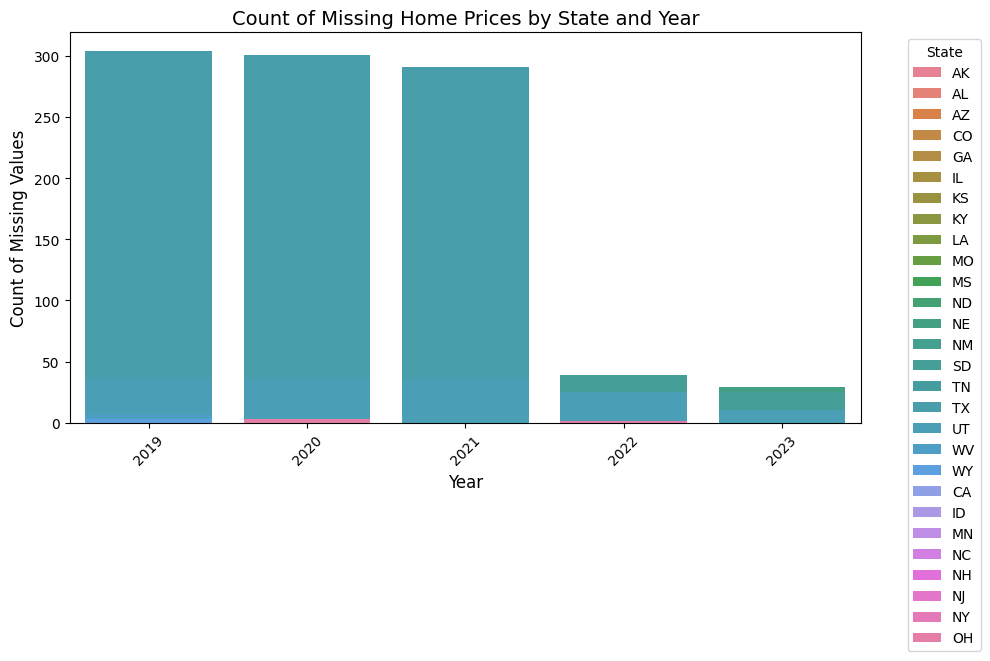

In [48]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_na, x='year', y='count', hue='state', dodge=False)

# Customize the plot
plt.title('Count of Missing Home Prices by State and Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Missing Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

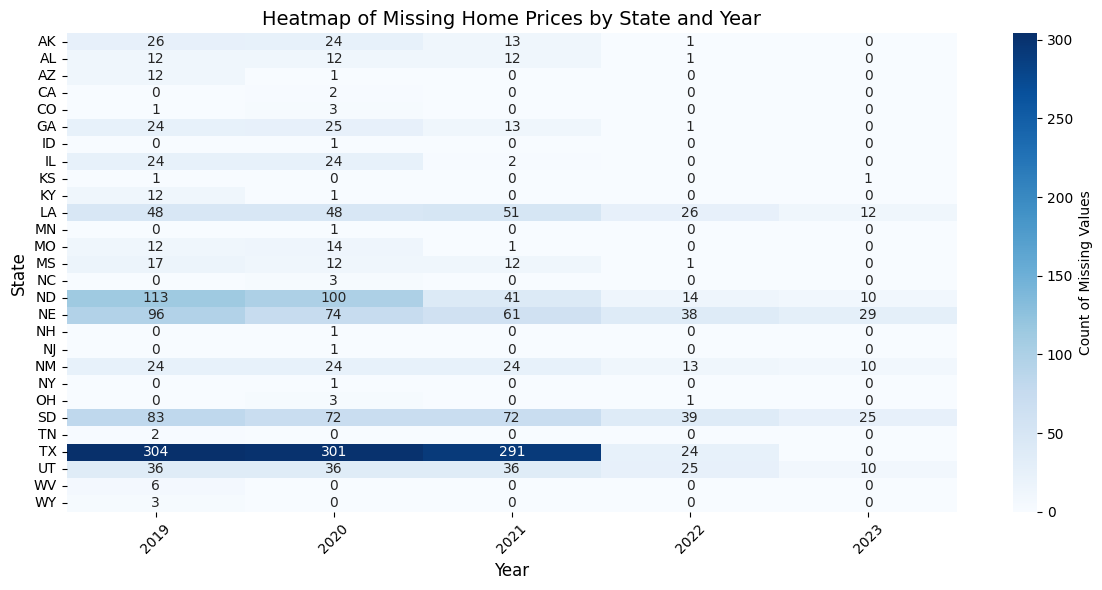

In [49]:
heatmap_data = grouped_na.pivot(index='state', columns='year', values='count').fillna(0)

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='Blues', cbar_kws={'label': 'Count of Missing Values'})

# Customize the plot
plt.title('Heatmap of Missing Home Prices by State and Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Where do we see the most NAs in census data?

/var/folders/0_/yp228wd50d5ggvdfycj3k2nm0000gn/T/ipykernel_62620/2925025095.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


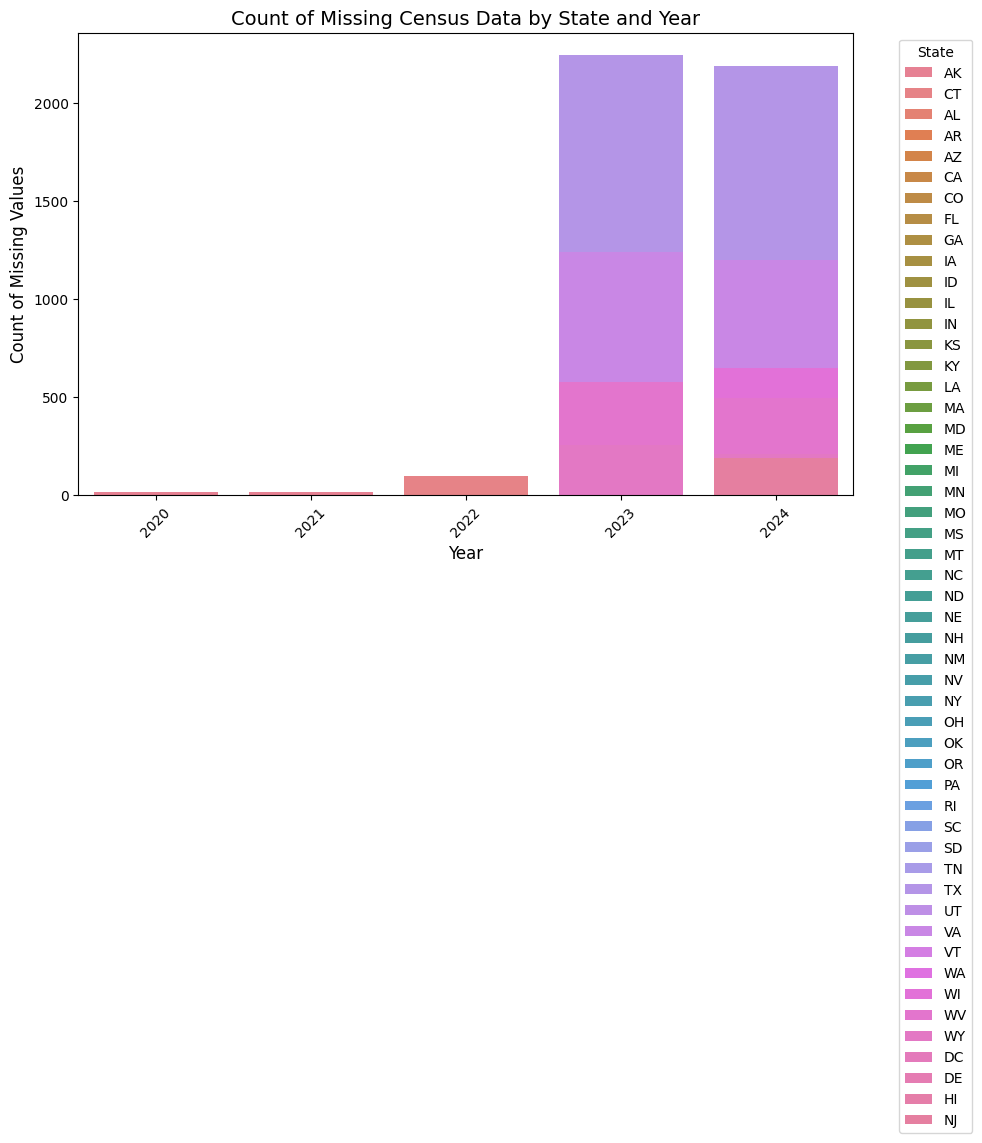

In [50]:
total_population_na = final_df[final_df['total_population'].isna()]
grouped_na_population = total_population_na.groupby(['state', 'year']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_na_population, x='year', y='count', hue='state', dodge=False)

# Customize the plot
plt.title('Count of Missing Census Data by State and Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Missing Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

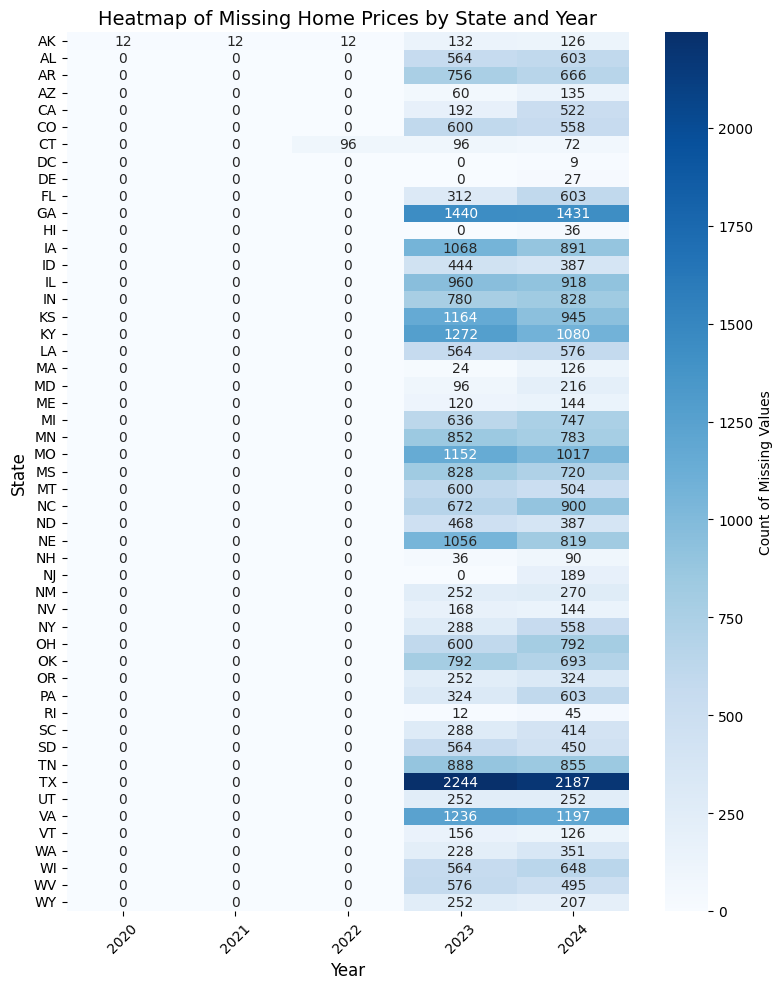

In [51]:
heatmap_data = grouped_na_population.pivot(index='state', columns='year', values='count').fillna(0)

# Create the heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='Blues', cbar_kws={'label': 'Count of Missing Values'})

# Customize the plot
plt.title('Heatmap of Missing Home Prices by State and Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on feature analysis, we see that most of Census null values come from 2023 data. We will train our models with data up to 2022 and predict 2023 housing price to obtain MSE. 

#### Further augmentation
For remote data, only select counties were available. To enhance the dataset, state-wide data was incorporated when county-level data was missing.

In [53]:
remote_by_state = pd.read_csv(data_path+'remote_data_bystate.csv')
remote_by_state.head(2)

,state,year,Total,WFH,remote ratio
0,Alabama,2017,"2,041,619","68,872",0.033734
1,Alaska,2017,"351,282","15,984",0.045502


In [55]:
import us

# Function to convert state name to abbreviation
def get_state_abbreviation(state_name):
    try:
        # Get the state abbreviation using the us library
        return us.states.lookup(state_name).abbr
    except AttributeError:
        # If the state name is invalid, return None or a default value
        return None

# Apply the function to the 'state' column and create a new column for state abbreviations
remote_by_state['state_abbreviation'] = remote_by_state['state'].apply(get_state_abbreviation)

# Display the updated DataFrame
print(remote_by_state[['state', 'state_abbreviation']].head())

        state state_abbreviation
0     Alabama                 AL
1      Alaska                 AK
2     Arizona                 AZ
3    Arkansas                 AR
4  California                 CA


In [56]:
cols = ['year', 'remote ratio','state_abbreviation']
remote_by_state = remote_by_state[cols]
remote_by_state = remote_by_state.rename(columns={'remote ratio': 'remote_ratio_state', "state_abbreviation":'state'})
remote_by_state.head(2)

,year,remote_ratio_state,state
0,2017,0.033734,AL
1,2017,0.045502,AK


In [57]:
remote_by_state.year.unique()

array([2017, 2018, 2019, 2021, 2022, 2023])

In [58]:
final_df = pd.merge(
    final_df,
    remote_by_state,
    how='left',
    left_on=['state', 'year'],  # Columns in the master dataset
    right_on=['state', 'year']  # Corresponding columns in the new dataset
)
final_df.head(4)

,county,state,FIPS_Code,date,home_price,date_first,unemployment_per_county,year,resident_population_per_county,totallisting_per_county,...,pct_race_white,pct_race_black,pct_race_native_amer,pct_race_asian,pct_race_pacific,pct_race_others,pct_hispanic,median_household_income,remote_ratio,remote_ratio_state
0,Los Angeles County,CA,6037,2019-01-31,631772.163507,2019-01-01,5.0,2019,10011.602,18131.0,...,54.4,9.2,1.6,16.3,0.6,22.2,48.5,3316795.0,0.058736,0.063447
1,Cook County,IL,17031,2019-01-31,232423.290403,2019-01-01,4.9,2019,5145.326,21464.0,...,58.9,24.4,0.8,8.3,0.1,10.3,25.3,1972108.0,0.054434,0.054256
2,Harris County,TX,48201,2019-01-31,195953.480566,2019-01-01,4.6,2019,4709.243,18598.0,...,64.5,20.0,0.9,7.8,0.2,9.1,42.9,1605368.0,0.044729,0.057124
3,Maricopa County,AZ,4013,2019-01-31,283185.935230,2019-01-01,4.6,2019,4492.261,21211.0,...,80.8,7.0,2.9,5.4,0.5,7.5,31.0,1552096.0,0.079432,0.075792


In [59]:
final_df['remote_imputed'] = final_df['remote_ratio'].fillna(final_df['remote_ratio_state'])
final_df.head(3)

,county,state,FIPS_Code,date,home_price,date_first,unemployment_per_county,year,resident_population_per_county,totallisting_per_county,...,pct_race_black,pct_race_native_amer,pct_race_asian,pct_race_pacific,pct_race_others,pct_hispanic,median_household_income,remote_ratio,remote_ratio_state,remote_imputed
0,Los Angeles County,CA,6037,2019-01-31,631772.163507,2019-01-01,5.0,2019,10011.602,18131.0,...,9.2,1.6,16.3,0.6,22.2,48.5,3316795.0,0.058736,0.063447,0.058736
1,Cook County,IL,17031,2019-01-31,232423.290403,2019-01-01,4.9,2019,5145.326,21464.0,...,24.4,0.8,8.3,0.1,10.3,25.3,1972108.0,0.054434,0.054256,0.054434
2,Harris County,TX,48201,2019-01-31,195953.480566,2019-01-01,4.6,2019,4709.243,18598.0,...,20.0,0.9,7.8,0.2,9.1,42.9,1605368.0,0.044729,0.057124,0.044729


### County-level data using DFS algorithm

In [62]:
county_clean = pd.read_excel(data_path+'county_clean_df.xlsx')
county_clean.head(2)

,Unnamed: 0,STATE,COUNTY,STATE_NAME,COUNTY_NAME,POPDEN_COU,HOUDEN_COU,COUNTY_FIPS_CODE,TOP_METRO
0,0,1,1,Alabama,Autauga,98.922916,40.962044,1001,False
1,1,1,3,Alabama,Baldwin,145.781265,78.088997,1003,False


In [63]:
county_clean = county_clean[['COUNTY_FIPS_CODE', 'TOP_METRO']]

### Adjacency

In [65]:
adjacency = pd.read_excel(data_path+'adjacency_df.xlsx')
adjacency.head(2)

,Unnamed: 0,county_fips,county_name,state_name,top_metro,neighbour_level,neighbour_county_fips,neighbour_county_name,neighbour_state_name,neighbour_top_metro
0,0,1073,Jefferson,Alabama,True,0,1073,Jefferson,Alabama,True
1,1,1073,Jefferson,Alabama,True,1,1007,Bibb,Alabama,False


In [66]:
ad_cols = ['county_fips', 'top_metro', 'neighbour_level', 'neighbour_top_metro']
adjacency2 = adjacency[ad_cols]
adjacency2.shape

(4543, 4)

In [67]:
print(county_clean[county_clean['COUNTY_FIPS_CODE']==6037])
# print(adjacency2[adjacency2['county_fips']== 6075].head(2))

     COUNTY_FIPS_CODE  TOP_METRO
175              6037      False


In [68]:
final_df = pd.merge(
    final_df,
    adjacency2,
    how='left',
    left_on=['FIPS_Code'],  # Columns in the master dataset
    right_on=['county_fips']  # Corresponding columns in the new dataset
)
final_df.head(2)

,county,state,FIPS_Code,date,home_price,date_first,unemployment_per_county,year,resident_population_per_county,totallisting_per_county,...,pct_race_others,pct_hispanic,median_household_income,remote_ratio,remote_ratio_state,remote_imputed,county_fips,top_metro,neighbour_level,neighbour_top_metro
0,Los Angeles County,CA,6037,2019-01-31,631772.163507,2019-01-01,5.0,2019,10011.602,18131.0,...,22.2,48.5,3316795.0,0.058736,0.063447,0.058736,NaN,NaN,NaN,NaN
1,Cook County,IL,17031,2019-01-31,232423.290403,2019-01-01,4.9,2019,5145.326,21464.0,...,10.3,25.3,1972108.0,0.054434,0.054256,0.054434,17031.0,True,0.0,True


In [69]:
final_df = pd.merge(
    final_df,
    county_clean,
    how='left',
    left_on=['FIPS_Code'],  # Columns in the master dataset
    right_on=['COUNTY_FIPS_CODE']  # Corresponding columns in the new dataset
)
final_df.head(2)

,county,state,FIPS_Code,date,home_price,date_first,unemployment_per_county,year,resident_population_per_county,totallisting_per_county,...,median_household_income,remote_ratio,remote_ratio_state,remote_imputed,county_fips,top_metro,neighbour_level,neighbour_top_metro,COUNTY_FIPS_CODE,TOP_METRO
0,Los Angeles County,CA,6037,2019-01-31,631772.163507,2019-01-01,5.0,2019,10011.602,18131.0,...,3316795.0,0.058736,0.063447,0.058736,NaN,NaN,NaN,NaN,6037.0,False
1,Cook County,IL,17031,2019-01-31,232423.290403,2019-01-01,4.9,2019,5145.326,21464.0,...,1972108.0,0.054434,0.054256,0.054434,17031.0,True,0.0,True,17031.0,True


In [70]:
final_df['TOP_METRO'] = final_df['TOP_METRO'].fillna(False)
final_df['neighbour_top_metro'] = final_df['neighbour_top_metro'].fillna(False)
final_df['top_metro'] = final_df['top_metro'].fillna(False)

/var/folders/0_/yp228wd50d5ggvdfycj3k2nm0000gn/T/ipykernel_62620/2475169100.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df['TOP_METRO'] = final_df['TOP_METRO'].fillna(False)
/var/folders/0_/yp228wd50d5ggvdfycj3k2nm0000gn/T/ipykernel_62620/2475169100.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df['neighbour_top_metro'] = final_df['neighbour_top_metro'].fillna(False)
/var/folders/0_/yp228wd50d5ggvdfycj3k2nm0000gn/T/ipykernel_62620/2475169100.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is depre

#### Drop rows where housing price is NA

In [71]:
final_df_old = final_df.copy()

In [72]:
final_df = final_df.dropna(subset=['home_price'])

In [73]:
len(final_df[final_df.TOP_METRO ==True].county.unique())

47

In [74]:
# check missing data rates again
summary_na = final_df.isna().sum().reset_index()
summary_na.columns = ['Column', 'Missing Count']
summary_na['Missing Percentage'] = (summary_na['Missing Count'] / len(final_df)) * 100
print(summary_na.sort_values(by='Missing Count', ascending=False))

                            Column  Missing Count  Missing Percentage
6          unemployment_per_county         408419           78.296085
23                    remote_ratio         325991           62.494201
9          totallisting_per_county         304078           58.293363
8   resident_population_per_county         299834           57.479766
28                 neighbour_level         206244           39.538067
26                     county_fips         206244           39.538067
24              remote_ratio_state         162488           31.149810
25                  remote_imputed         158024           30.294038
15                  pct_race_white          97799           18.748586
22         median_household_income          97799           18.748586
21                    pct_hispanic          97799           18.748586
20                 pct_race_others          97799           18.748586
19                pct_race_pacific          97799           18.748586
18                  

In [75]:
final_cols = ['county', 'state', 'FIPS_Code', 'date', 'year',
       #'resident_population_per_county', 'totallisting_per_county',
       'total_population', 'pct_male', 'pct_female', 'pct_age18over',
       'pct_age65over', 'pct_race_white', 'pct_race_black',
       'pct_race_native_amer', 'pct_race_asian', 'pct_race_pacific',
       'pct_race_others', 'pct_hispanic', 'median_household_income', 'remote_imputed', 
       'TOP_METRO', 'home_price', 'neighbour_level', 'neighbour_top_metro']

In [76]:
no_na_2022 = final_df[final_df['year'] == 2022].dropna(subset=['total_population'])
no_na_2022.shape

(91052, 32)

In [77]:
no_na_2023 = final_df[final_df['year'] == 2023].dropna(subset=['total_population'])
no_na_2023.shape

(61044, 32)

In [78]:
no_na_2024 = final_df[final_df['year'] == 2024].dropna(subset=['total_population'])
no_na_2024.shape

(0, 32)

## Export

In [79]:
data_export = final_df[final_cols]

In [81]:

data_export.to_csv(data_path+'all_datasets_joined.csv', index=False)

In [82]:
data_export.shape

(521634, 23)

## Modeling Approach
- handle 2023 missing data
- Train using ~ 2022 data (ridge, lasso, elastic net)
- Test with 2023 housing price 
- Get MSE
- predict 2024 price

### Feature Engineering

In [83]:
data_export['neighbour_level'] = data_export['neighbour_level'].fillna(9.0)
data_export.loc[:, 'TOP_METRO'] = data_export['TOP_METRO'].astype(int)
data_export['neighbour_top_metro'] = data_export['neighbour_top_metro'].astype(int)
data_export

/var/folders/0_/yp228wd50d5ggvdfycj3k2nm0000gn/T/ipykernel_62620/2747438858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_export['neighbour_level'] = data_export['neighbour_level'].fillna(9.0)
/var/folders/0_/yp228wd50d5ggvdfycj3k2nm0000gn/T/ipykernel_62620/2747438858.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 1 1 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_export.loc[:, 'TOP_METRO'] = data_export['TOP_METRO'].astype(int)
/var/folders/0_/yp228wd50d5ggvdfycj3k2nm0000gn/T/ipykernel_62620/2747438858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,county,state,FIPS_Code,date,year,total_population,pct_male,pct_female,pct_age18over,pct_age65over,...,pct_race_asian,pct_race_pacific,pct_race_others,pct_hispanic,median_household_income,remote_imputed,TOP_METRO,home_price,neighbour_level,neighbour_top_metro
0,Los Angeles County,CA,6037,2019-01-31,2019,10081570.0,49.3,50.7,78.0,13.3,...,16.3,0.6,22.2,48.5,3316795.0,0.058736,0,631772.163507,9.0,0
1,Cook County,IL,17031,2019-01-31,2019,5198275.0,48.5,51.5,78.0,14.3,...,8.3,0.1,10.3,25.3,1972108.0,0.054434,1,232423.290403,0.0,1
2,Cook County,IL,17031,2019-01-31,2019,5198275.0,48.5,51.5,78.0,14.3,...,8.3,0.1,10.3,25.3,1972108.0,0.054434,1,232423.290403,1.0,0
3,Cook County,IL,17031,2019-01-31,2019,5198275.0,48.5,51.5,78.0,14.3,...,8.3,0.1,10.3,25.3,1972108.0,0.054434,1,232423.290403,1.0,0
4,Cook County,IL,17031,2019-01-31,2019,5198275.0,48.5,51.5,78.0,14.3,...,8.3,0.1,10.3,25.3,1972108.0,0.054434,1,232423.290403,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524179,Banner County,NE,31007,2024-09-30,2024,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,336171.914864,9.0,0
524180,Daggett County,UT,49009,2024-09-30,2024,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,319855.715781,9.0,0
524181,Thomas County,NE,31171,2024-09-30,2024,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,141689.697397,9.0,0
524182,McPherson County,NE,31117,2024-09-30,2024,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,310842.045199,9.0,0


In [84]:
# columns for hot encoding
hot_encode_cols = ['TOP_METRO', 'neighbour_top_metro', 'neighbour_level']
df_model = pd.get_dummies(data_export, columns=hot_encode_cols, drop_first=False)
df_model.head(2)

,county,state,FIPS_Code,date,year,total_population,pct_male,pct_female,pct_age18over,pct_age65over,...,TOP_METRO_1,neighbour_top_metro_0,neighbour_top_metro_1,neighbour_level_0.0,neighbour_level_1.0,neighbour_level_2.0,neighbour_level_3.0,neighbour_level_4.0,neighbour_level_5.0,neighbour_level_9.0
0,Los Angeles County,CA,6037,2019-01-31,2019,10081570.0,49.3,50.7,78.0,13.3,...,False,True,False,False,False,False,False,False,False,True
1,Cook County,IL,17031,2019-01-31,2019,5198275.0,48.5,51.5,78.0,14.3,...,True,False,True,True,False,False,False,False,False,False


In [85]:
df_model.columns

Index(['county', 'state', 'FIPS_Code', 'date', 'year', 'total_population',
       'pct_male', 'pct_female', 'pct_age18over', 'pct_age65over',
       'pct_race_white', 'pct_race_black', 'pct_race_native_amer',
       'pct_race_asian', 'pct_race_pacific', 'pct_race_others', 'pct_hispanic',
       'median_household_income', 'remote_imputed', 'home_price',
       'TOP_METRO_0', 'TOP_METRO_1', 'neighbour_top_metro_0',
       'neighbour_top_metro_1', 'neighbour_level_0.0', 'neighbour_level_1.0',
       'neighbour_level_2.0', 'neighbour_level_3.0', 'neighbour_level_4.0',
       'neighbour_level_5.0', 'neighbour_level_9.0'],
      dtype='object')

In [86]:
# hot encoding to binary
binary_cols = ['TOP_METRO_0', 'neighbour_top_metro_0',
       'neighbour_top_metro_1', 'neighbour_level_0.0', 'neighbour_level_1.0',
       'neighbour_level_2.0', 'neighbour_level_3.0', 'neighbour_level_4.0',
       'neighbour_level_5.0', 'neighbour_level_9.0']
df_model[binary_cols] = df_model[binary_cols].astype(int)
df_model.head(2)

,county,state,FIPS_Code,date,year,total_population,pct_male,pct_female,pct_age18over,pct_age65over,...,TOP_METRO_1,neighbour_top_metro_0,neighbour_top_metro_1,neighbour_level_0.0,neighbour_level_1.0,neighbour_level_2.0,neighbour_level_3.0,neighbour_level_4.0,neighbour_level_5.0,neighbour_level_9.0
0,Los Angeles County,CA,6037,2019-01-31,2019,10081570.0,49.3,50.7,78.0,13.3,...,False,1,0,0,0,0,0,0,0,1
1,Cook County,IL,17031,2019-01-31,2019,5198275.0,48.5,51.5,78.0,14.3,...,True,0,1,1,0,0,0,0,0,0


In [87]:
df_model['month'] = df_model['date'].dt.month

In [88]:
print(df_model.shape)
df_model.head(2)

(521634, 32)


,county,state,FIPS_Code,date,year,total_population,pct_male,pct_female,pct_age18over,pct_age65over,...,neighbour_top_metro_0,neighbour_top_metro_1,neighbour_level_0.0,neighbour_level_1.0,neighbour_level_2.0,neighbour_level_3.0,neighbour_level_4.0,neighbour_level_5.0,neighbour_level_9.0,month
0,Los Angeles County,CA,6037,2019-01-31,2019,10081570.0,49.3,50.7,78.0,13.3,...,1,0,0,0,0,0,0,0,1,1
1,Cook County,IL,17031,2019-01-31,2019,5198275.0,48.5,51.5,78.0,14.3,...,0,1,1,0,0,0,0,0,0,1


In [89]:
# no_na = df_model.dropna(subset=['total_population'])
# print(no_na.groupby("year")['county'].nunique())
# print(no_na.county.unique())
# no_na.head(4)

In [90]:
before_23 = df_model[df_model['year'] <= 2022]
print(before_23.shape)
before_23.head(2)

(362923, 32)


,county,state,FIPS_Code,date,year,total_population,pct_male,pct_female,pct_age18over,pct_age65over,...,neighbour_top_metro_0,neighbour_top_metro_1,neighbour_level_0.0,neighbour_level_1.0,neighbour_level_2.0,neighbour_level_3.0,neighbour_level_4.0,neighbour_level_5.0,neighbour_level_9.0,month
0,Los Angeles County,CA,6037,2019-01-31,2019,10081570.0,49.3,50.7,78.0,13.3,...,1,0,0,0,0,0,0,0,1,1
1,Cook County,IL,17031,2019-01-31,2019,5198275.0,48.5,51.5,78.0,14.3,...,0,1,1,0,0,0,0,0,0,1


In [91]:
train_nas = before_23[before_23.isna().any(axis=1)]
print(train_nas.shape)

(90680, 32)


In [92]:
summary_na = before_23.isna().sum().reset_index()
summary_na.columns = ['Column', 'Missing Count']
summary_na['Missing Percentage'] = (summary_na['Missing Count'] / len(before_23)) * 100
print(summary_na.sort_values(by='Missing Count', ascending=False))

                     Column  Missing Count  Missing Percentage
18           remote_imputed          90560           24.952951
16             pct_hispanic            132            0.036371
9             pct_age65over            132            0.036371
17  median_household_income            132            0.036371
15          pct_race_others            132            0.036371
14         pct_race_pacific            132            0.036371
13           pct_race_asian            132            0.036371
12     pct_race_native_amer            132            0.036371
10           pct_race_white            132            0.036371
11           pct_race_black            132            0.036371
8             pct_age18over            132            0.036371
7                pct_female            132            0.036371
6                  pct_male            132            0.036371
5          total_population            132            0.036371
23    neighbour_top_metro_1              0            0

In [93]:
no_na = before_23[before_23.isna().any(axis=1)]
print(no_na.groupby("year")['county'].nunique())
no_na.head(2)

year
2020    1803
2021       1
2022       9
Name: county, dtype: int64


,county,state,FIPS_Code,date,year,total_population,pct_male,pct_female,pct_age18over,pct_age65over,...,neighbour_top_metro_0,neighbour_top_metro_1,neighbour_level_0.0,neighbour_level_1.0,neighbour_level_2.0,neighbour_level_3.0,neighbour_level_4.0,neighbour_level_5.0,neighbour_level_9.0,month
91344,Los Angeles County,CA,6037,2020-01-31,2020,10040682.0,49.3,50.7,78.3,13.6,...,1,0,0,0,0,0,0,0,1,1
91345,Cook County,IL,17031,2020-01-31,2020,5169517.0,48.5,51.5,78.2,14.7,...,0,1,1,0,0,0,0,0,0,1


### We still have a lot of missing data - we will just drop them
for remote data, 2020 data is not available. Since 2020 was an outlier year, we will just drop them.

## Final feature engineered dataset >> df_model 

In [94]:
before_23_v2 = df_model[df_model['year'] <= 2022]
before_23_v2 = before_23_v2.dropna()
before_23_v2.shape

(272243, 32)

In [95]:
summary_na = before_23_v2.isna().sum().reset_index()
summary_na.columns = ['Column', 'Missing Count']
summary_na['Missing Percentage'] = (summary_na['Missing Count'] / len(before_23_v2)) * 100
print(summary_na.sort_values(by='Missing Count', ascending=False))

                     Column  Missing Count  Missing Percentage
0                    county              0                 0.0
1                     state              0                 0.0
30      neighbour_level_9.0              0                 0.0
29      neighbour_level_5.0              0                 0.0
28      neighbour_level_4.0              0                 0.0
27      neighbour_level_3.0              0                 0.0
26      neighbour_level_2.0              0                 0.0
25      neighbour_level_1.0              0                 0.0
24      neighbour_level_0.0              0                 0.0
23    neighbour_top_metro_1              0                 0.0
22    neighbour_top_metro_0              0                 0.0
21              TOP_METRO_1              0                 0.0
20              TOP_METRO_0              0                 0.0
19               home_price              0                 0.0
18           remote_imputed              0             

In [96]:
# standardize
standardize_cols = [
       'total_population', 'pct_male', 'pct_female', 'pct_age18over',
       'pct_age65over', 'pct_race_white', 'pct_race_black',
       'pct_race_native_amer', 'pct_race_asian', 'pct_race_pacific',
       'pct_race_others', 'pct_hispanic', 'median_household_income', 'remote_imputed']

scaler = StandardScaler()

# Fit and transform the specified columns
before_23_v2[standardize_cols] = scaler.fit_transform(before_23_v2[standardize_cols])


In [97]:
feature_cols = ['year',  'month', 
       'total_population', 'pct_male', 'pct_female', 'pct_age18over',
       'pct_age65over', 'pct_race_white', 'pct_race_black',
       'pct_race_native_amer', 'pct_race_asian', 'pct_race_pacific',
       'pct_race_others', 'pct_hispanic', 'median_household_income',
       'remote_imputed',  'TOP_METRO_1', 'TOP_METRO_0', 'neighbour_top_metro_0',
       'neighbour_top_metro_1', 'neighbour_level_0.0', 'neighbour_level_1.0',
       'neighbour_level_2.0', 'neighbour_level_3.0', 'neighbour_level_4.0',
       'neighbour_level_5.0', 'neighbour_level_9.0', 'home_price']

train_data = before_23_v2[feature_cols]
print(train_data.shape)
train_data.head(2)

(272243, 28)


,year,month,total_population,pct_male,pct_female,pct_age18over,pct_age65over,pct_race_white,pct_race_black,pct_race_native_amer,...,neighbour_top_metro_0,neighbour_top_metro_1,neighbour_level_0.0,neighbour_level_1.0,neighbour_level_2.0,neighbour_level_3.0,neighbour_level_4.0,neighbour_level_5.0,neighbour_level_9.0,home_price
0,2019,1,10.566556,-0.077879,0.077874,0.000459,-0.753011,-1.253467,-0.427840,-0.148899,...,1,0,0,0,0,0,0,0,1,631772.163507
1,2019,1,5.142893,-0.518104,0.518099,0.000459,-0.515698,-1.000973,0.491362,-0.344159,...,0,1,1,0,0,0,0,0,0,232423.290403


### Train data

In [98]:
X_train = train_data.iloc[:, :-1]  
y_train = train_data.iloc[:, -1]   
print(X_train.shape)
print(y_train.shape)
X_train.head(2)

(272243, 27)
(272243,)


,year,month,total_population,pct_male,pct_female,pct_age18over,pct_age65over,pct_race_white,pct_race_black,pct_race_native_amer,...,TOP_METRO_0,neighbour_top_metro_0,neighbour_top_metro_1,neighbour_level_0.0,neighbour_level_1.0,neighbour_level_2.0,neighbour_level_3.0,neighbour_level_4.0,neighbour_level_5.0,neighbour_level_9.0
0,2019,1,10.566556,-0.077879,0.077874,0.000459,-0.753011,-1.253467,-0.427840,-0.148899,...,1,1,0,0,0,0,0,0,0,1
1,2019,1,5.142893,-0.518104,0.518099,0.000459,-0.515698,-1.000973,0.491362,-0.344159,...,0,0,1,1,0,0,0,0,0,0


### Test data

In [99]:
test_data = df_model.copy()
test_data_processed = test_data.set_index(['county', 'year'])  # Set multi-index to match with train_data
test_data_processed = test_data_processed.sort_index() 
test_data_processed = test_data_processed.fillna(method='ffill') 
test_data_processed = test_data_processed.reset_index()
test_data_processed.head(4)

/var/folders/0_/yp228wd50d5ggvdfycj3k2nm0000gn/T/ipykernel_62620/3216319454.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data_processed = test_data_processed.fillna(method='ffill')


,county,year,state,FIPS_Code,date,total_population,pct_male,pct_female,pct_age18over,pct_age65over,...,neighbour_top_metro_0,neighbour_top_metro_1,neighbour_level_0.0,neighbour_level_1.0,neighbour_level_2.0,neighbour_level_3.0,neighbour_level_4.0,neighbour_level_5.0,neighbour_level_9.0,month
0,Abbeville County,2019,SC,45001,2019-01-31,24627.0,48.5,51.5,79.4,21.1,...,1,0,0,0,0,0,0,0,1,1
1,Abbeville County,2019,SC,45001,2019-02-28,24627.0,48.5,51.5,79.4,21.1,...,1,0,0,0,0,0,0,0,1,2
2,Abbeville County,2019,SC,45001,2019-03-31,24627.0,48.5,51.5,79.4,21.1,...,1,0,0,0,0,0,0,0,1,3
3,Abbeville County,2019,SC,45001,2019-04-30,24627.0,48.5,51.5,79.4,21.1,...,1,0,0,0,0,0,0,0,1,4


In [100]:
test_data = test_data_processed[test_data_processed['year'] == 2023]
test_data.dtypes

county                             object
year                                int32
state                              object
FIPS_Code                           int64
date                       datetime64[ns]
total_population                  float64
pct_male                          float64
pct_female                        float64
pct_age18over                     float64
pct_age65over                     float64
pct_race_white                    float64
pct_race_black                     object
pct_race_native_amer               object
pct_race_asian                     object
pct_race_pacific                   object
pct_race_others                   float64
pct_hispanic                      float64
median_household_income           float64
remote_imputed                    float64
home_price                        float64
TOP_METRO_0                         int64
TOP_METRO_1                          bool
neighbour_top_metro_0               int64
neighbour_top_metro_1             

In [101]:
# tranform object to float
object_cols = ['pct_race_black','pct_race_native_amer', 'pct_race_asian', 'pct_race_pacific']
test_data.loc[:, object_cols]= test_data[object_cols].replace('N', np.nan)

# Step 2: Convert columns to numeric (forcing 'N' or any non-numeric to NaN)
test_data[object_cols] = test_data[object_cols].apply(pd.to_numeric, errors='coerce')

/var/folders/0_/yp228wd50d5ggvdfycj3k2nm0000gn/T/ipykernel_62620/4255687991.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[object_cols] = test_data[object_cols].apply(pd.to_numeric, errors='coerce')


In [102]:
print(test_data.dtypes)
test_data.head(2)

county                             object
year                                int32
state                              object
FIPS_Code                           int64
date                       datetime64[ns]
total_population                  float64
pct_male                          float64
pct_female                        float64
pct_age18over                     float64
pct_age65over                     float64
pct_race_white                    float64
pct_race_black                    float64
pct_race_native_amer              float64
pct_race_asian                    float64
pct_race_pacific                  float64
pct_race_others                   float64
pct_hispanic                      float64
median_household_income           float64
remote_imputed                    float64
home_price                        float64
TOP_METRO_0                         int64
TOP_METRO_1                          bool
neighbour_top_metro_0               int64
neighbour_top_metro_1             

,county,year,state,FIPS_Code,date,total_population,pct_male,pct_female,pct_age18over,pct_age65over,...,neighbour_top_metro_0,neighbour_top_metro_1,neighbour_level_0.0,neighbour_level_1.0,neighbour_level_2.0,neighbour_level_3.0,neighbour_level_4.0,neighbour_level_5.0,neighbour_level_9.0,month
48,Abbeville County,2023,SC,45001,2023-01-31,24368.0,48.7,51.3,80.2,22.1,...,1,0,0,0,0,0,0,0,1,1
49,Abbeville County,2023,SC,45001,2023-02-28,24368.0,48.7,51.3,80.2,22.1,...,1,0,0,0,0,0,0,0,1,2


In [103]:
summary_na = test_data.isna().sum().reset_index()
summary_na.columns = ['Column', 'Missing Count']
summary_na['Missing Percentage'] = (summary_na['Missing Count'] / len(test_data)) * 100
print(summary_na.sort_values(by='Missing Count', ascending=False))

                     Column  Missing Count  Missing Percentage
14         pct_race_pacific          19943           21.856061
13           pct_race_asian            492            0.539196
12     pct_race_native_amer             72            0.078907
11           pct_race_black             12            0.013151
0                    county              0            0.000000
18           remote_imputed              0            0.000000
20              TOP_METRO_0              0            0.000000
21              TOP_METRO_1              0            0.000000
22    neighbour_top_metro_0              0            0.000000
23    neighbour_top_metro_1              0            0.000000
24      neighbour_level_0.0              0            0.000000
25      neighbour_level_1.0              0            0.000000
26      neighbour_level_2.0              0            0.000000
27      neighbour_level_3.0              0            0.000000
28      neighbour_level_4.0              0            0

In [104]:
test_data_processed = test_data.dropna()
test_data_processed.shape

(71088, 32)

In [105]:
test_data_processed[standardize_cols] = scaler.fit_transform(test_data_processed[standardize_cols])


/var/folders/0_/yp228wd50d5ggvdfycj3k2nm0000gn/T/ipykernel_62620/1910407525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_processed[standardize_cols] = scaler.fit_transform(test_data_processed[standardize_cols])


In [106]:
feature_cols = ['year',
 'month',
 'total_population',
 'pct_male',
 'pct_female',
 'pct_age18over',
 'pct_age65over',
 'pct_race_white',
 'pct_race_black',
 'pct_race_native_amer',
 'pct_race_asian',
 'pct_race_pacific',
 'pct_race_others',
 'pct_hispanic',
 'median_household_income',
 'remote_imputed',
 'TOP_METRO_1', 'TOP_METRO_0',
 'neighbour_top_metro_0',
 'neighbour_top_metro_1', 'neighbour_level_0.0', 'neighbour_level_1.0',
 'neighbour_level_2.0', 'neighbour_level_3.0', 'neighbour_level_4.0',
 'neighbour_level_5.0', 'neighbour_level_9.0',
 'home_price',
 'FIPS_Code']

In [107]:
test_data_processed = test_data_processed.reset_index()
test_data_processed.head(3)

,index,county,year,state,FIPS_Code,date,total_population,pct_male,pct_female,pct_age18over,...,neighbour_top_metro_0,neighbour_top_metro_1,neighbour_level_0.0,neighbour_level_1.0,neighbour_level_2.0,neighbour_level_3.0,neighbour_level_4.0,neighbour_level_5.0,neighbour_level_9.0,month
0,48,Abbeville County,2023,SC,45001,2023-01-31,-0.687262,-0.413889,0.413889,0.515738,...,1,0,0,0,0,0,0,0,1,1
1,49,Abbeville County,2023,SC,45001,2023-02-28,-0.687262,-0.413889,0.413889,0.515738,...,1,0,0,0,0,0,0,0,1,2
2,50,Abbeville County,2023,SC,45001,2023-03-31,-0.687262,-0.413889,0.413889,0.515738,...,1,0,0,0,0,0,0,0,1,3


In [108]:
test_df_final = test_data_processed[feature_cols]

In [109]:
test_df_final.iloc[:, -2]  

0        186920.992139
1        188876.277190
2        191390.068748
3        193539.688251
4        195304.028548
             ...      
71083     89480.293577
71084     88205.132476
71085     86677.069820
71086     85600.389091
71087     84310.433924
Name: home_price, Length: 71088, dtype: float64

In [110]:
X_test = test_df_final.iloc[:, :-2]  
y_test = test_df_final.iloc[:, -2]   
print(X_test.shape)
print(y_test.shape)
X_test.head(2)

(71088, 27)
(71088,)


,year,month,total_population,pct_male,pct_female,pct_age18over,pct_age65over,pct_race_white,pct_race_black,pct_race_native_amer,...,TOP_METRO_0,neighbour_top_metro_0,neighbour_top_metro_1,neighbour_level_0.0,neighbour_level_1.0,neighbour_level_2.0,neighbour_level_3.0,neighbour_level_4.0,neighbour_level_5.0,neighbour_level_9.0
0,2023,1,-0.687262,-0.413889,0.413889,0.515738,1.104758,-0.028553,0.605924,-0.502895,...,1,1,0,0,0,0,0,0,0,1
1,2023,2,-0.687262,-0.413889,0.413889,0.515738,1.104758,-0.028553,0.605924,-0.502895,...,1,1,0,0,0,0,0,0,0,1


#### Ensure columns are matching

In [111]:
X_test.columns

Index(['year', 'month', 'total_population', 'pct_male', 'pct_female',
       'pct_age18over', 'pct_age65over', 'pct_race_white', 'pct_race_black',
       'pct_race_native_amer', 'pct_race_asian', 'pct_race_pacific',
       'pct_race_others', 'pct_hispanic', 'median_household_income',
       'remote_imputed', 'TOP_METRO_1', 'TOP_METRO_0', 'neighbour_top_metro_0',
       'neighbour_top_metro_1', 'neighbour_level_0.0', 'neighbour_level_1.0',
       'neighbour_level_2.0', 'neighbour_level_3.0', 'neighbour_level_4.0',
       'neighbour_level_5.0', 'neighbour_level_9.0'],
      dtype='object')

In [112]:
X_train.columns

Index(['year', 'month', 'total_population', 'pct_male', 'pct_female',
       'pct_age18over', 'pct_age65over', 'pct_race_white', 'pct_race_black',
       'pct_race_native_amer', 'pct_race_asian', 'pct_race_pacific',
       'pct_race_others', 'pct_hispanic', 'median_household_income',
       'remote_imputed', 'TOP_METRO_1', 'TOP_METRO_0', 'neighbour_top_metro_0',
       'neighbour_top_metro_1', 'neighbour_level_0.0', 'neighbour_level_1.0',
       'neighbour_level_2.0', 'neighbour_level_3.0', 'neighbour_level_4.0',
       'neighbour_level_5.0', 'neighbour_level_9.0'],
      dtype='object')

#### We now have X_train, X_test, y_train, y_test

## Modeling
### 1. Ridge

In [113]:
store_mse = dict()
store_sqrt = dict()

In [114]:

lmda = np.linspace(0.001, 1, 50)
ridge_fit = RidgeCV(alphas=lmda, store_cv_values=True, fit_intercept = True)
ridge_fit.fit(X_train, y_train)

/Users/arman/.pyenv/versions/3.11.9/envs/dva-project/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


RidgeCV(alphas=array([0.001     , 0.02138776, 0.04177551, 0.06216327, 0.08255102,
       0.10293878, 0.12332653, 0.14371429, 0.16410204, 0.1844898 ,
       0.20487755, 0.22526531, 0.24565306, 0.26604082, 0.28642857,
       0.30681633, 0.32720408, 0.34759184, 0.36797959, 0.38836735,
       0.4087551 , 0.42914286, 0.44953061, 0.46991837, 0.49030612,
       0.51069388, 0.53108163, 0.55146939, 0.57185714, 0.5922449 ,
       0.61263265, 0.63302041, 0.65340816, 0.67379592, 0.69418367,
       0.71457143, 0.73495918, 0.75534694, 0.77573469, 0.79612245,
       0.8165102 , 0.83689796, 0.85728571, 0.87767347, 0.89806122,
       0.91844898, 0.93883673, 0.95922449, 0.97961224, 1.        ]),
        store_cv_values=True)

In [115]:
best_lmda = ridge_fit.alpha_
best_lmda

np.float64(0.001)

In [116]:
ridge_final = Ridge(alpha=best_lmda)
ridge_final.fit(X_train, y_train)

# Get the coefficients
ridge_coefficients = ridge_final.coef_
print("Coefficients:")
print(ridge_coefficients)

# Predict on the test set
ridge_y_pred = ridge_final.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the test set
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
store_mse['Ridge MSE'] = ridge_mse
print("Ridge MSE: ", ridge_mse)

Coefficients:
[ 2.46517764e+03  1.69184119e+03 -1.77862277e+05 -6.60982223e+05
 -6.49405168e+05  6.56089663e+04 -4.17950971e+04 -1.42867164e+05
 -1.87156007e+05 -2.47363755e+04  5.12360043e+04  2.10578539e+03
  2.70660598e+04 -1.97536268e+04  1.58745875e+05  3.46732434e+04
  4.48296300e+03 -4.48296297e+03 -1.28444780e+04  1.28444783e+04
 -1.84704723e+04  3.09947114e+03  6.10203512e+02  4.26690810e+03
  7.77915070e+03  7.19971096e+03 -4.48335170e+03]
Ridge MSE:  17592608268.363075


In [117]:
print(np.sqrt(ridge_mse))
store_sqrt['Ridge SQRT'] = np.sqrt(ridge_mse)

132637.13005174333


### Ridge Coeff Graph for Poster

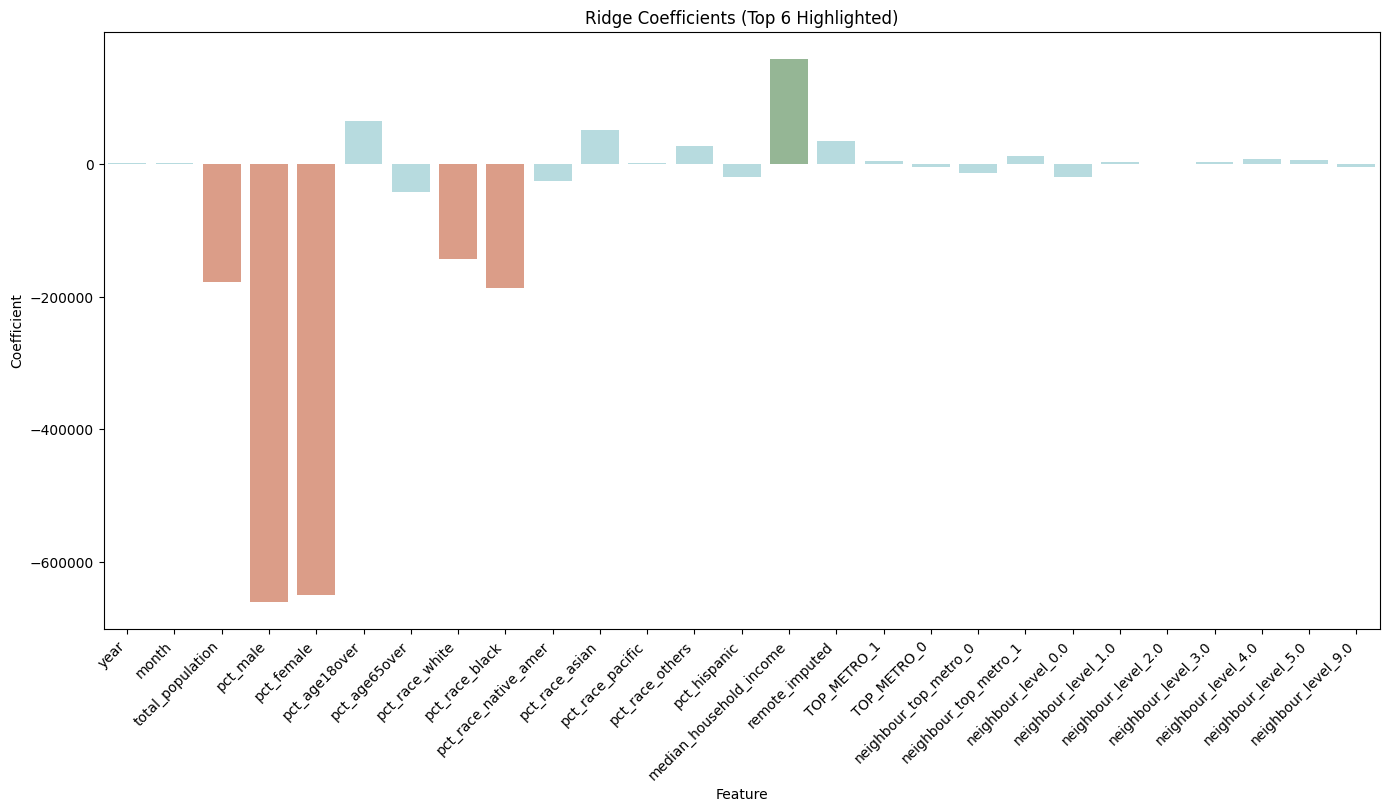

In [118]:
ridge_coefficients = np.array(ridge_coefficients)  # Ensure it's a NumPy array
X_train_cols = np.array(X_train.columns)  # Ensure it's a NumPy array

coef_df = pd.DataFrame({'Feature': X_train_cols, 'Coefficient': ridge_coefficients})

# Identify top 5 coefficients by magnitude
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
top5 = coef_df.nlargest(6, 'Abs_Coefficient')

top5_dict = top5.set_index('Feature')['Coefficient'].to_dict()

coef_df['Color']  = [
     'darksalmon' if feature in top5_dict and top5_dict.get(feature, 0) < 0
    else 'darkseagreen' if feature in top5_dict and top5_dict.get(feature, 0) > 0
    else '#d0f0ff'
    for feature in coef_df['Feature']
]

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data = coef_df,
    y=coef_df['Coefficient'],
    x=coef_df['Feature'],
    hue = coef_df['Color'],
    palette = ['powderblue', 'darksalmon', 'darkseagreen',]
    )

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend([], [], frameon=False)
plt.title("Ridge Coefficients (Top 6 Highlighted)")
plt.show()


### 2. Lasso

In [119]:
lmda_lasso = np.linspace(1.9,3,15)
lasso_fit = LassoCV(alphas=lmda_lasso, cv=5, fit_intercept = True, max_iter=4000)
lasso_fit.fit(X_train, y_train)
lasso_best_lmda = lasso_fit.alpha_
lasso_best_lmda

np.float64(3.0)

In [120]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=lasso_best_lmda, max_iter=3000)
lasso.fit(X_train, y_train)

# Get the coefficients
lasso_coefficients = lasso.coef_
print("Coefficients:")
print(lasso_coefficients)

# Predict on the test set
lasso_y_pred = lasso.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the test set
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
store_mse['Lasso MSE'] = lasso_mse

print("Lasso MSE: ", lasso_mse)

Coefficients:
[ 2.43891789e+03  1.69158878e+03 -1.76207473e+05 -1.15842406e+04
  0.00000000e+00  6.56376740e+04 -4.17821776e+04 -1.42327091e+05
 -1.86630423e+05 -2.46224905e+04  5.13917760e+04  2.09196888e+03
  2.71708252e+04 -1.97568146e+04  1.57082420e+05  3.47010403e+04
  1.65905143e+04 -0.00000000e+00 -2.49886878e+04  4.09834444e-09
 -2.04208950e+04 -0.00000000e+00 -2.45587308e+03  1.13922606e+03
  4.65937545e+03  4.07550251e+03 -0.00000000e+00]
Lasso MSE:  17593674908.084183


In [121]:
print(np.sqrt(lasso_mse))
store_sqrt['Lasso SQRT'] = np.sqrt(lasso_mse)

132641.15088495042


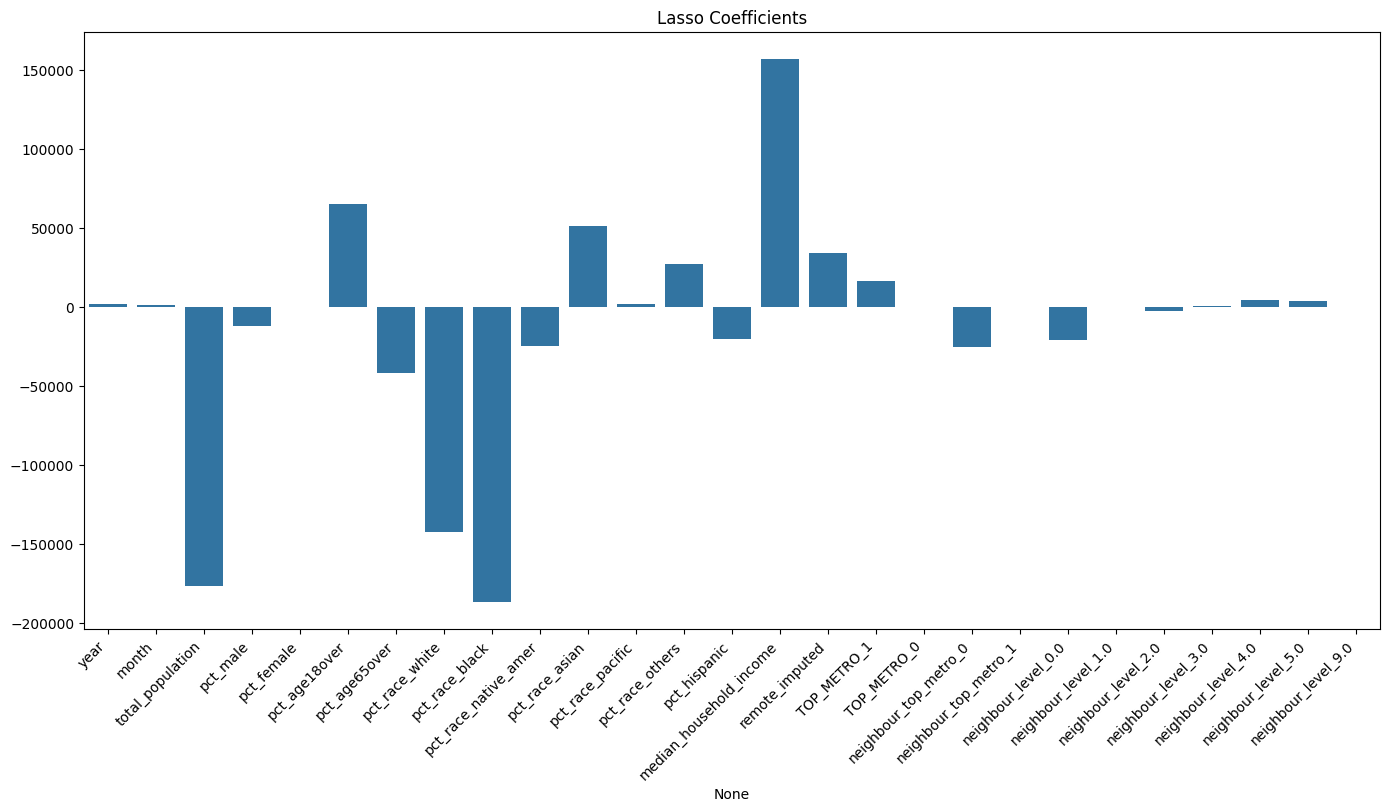

In [122]:
X_train_cols = X_train.columns
plt.figure(figsize=(14, 8))
sns.barplot(y=lasso_coefficients, x= X_train_cols )

plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.title("Lasso Coefficients")
plt.show()


### 3. Elastic Net

In [123]:
ela_net_lmda = np.linspace(0.009, 0.5, 10)
elastic_cv = ElasticNetCV(alphas=ela_net_lmda, cv=10, l1_ratio=0.4, max_iter=7000, tol=1e-4)
elastic_cv.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.009     , 0.06355556, 0.11811111, 0.17266667, 0.22722222,
       0.28177778, 0.33633333, 0.39088889, 0.44544444, 0.5       ]),
             cv=10, l1_ratio=0.4, max_iter=7000)

In [124]:
ela_net_alpha = elastic_cv.alpha_
ela_net_coef = elastic_cv.coef_
print("Optimal Alpha: ", ela_net_alpha)

# plt.figure(figsize=(8, 3))
# sns.barplot(y=ela_net_coef, x= cols )

Optimal Alpha:  0.009


In [125]:
X_train_cols = X_train.columns
X_train_cols

Index(['year', 'month', 'total_population', 'pct_male', 'pct_female',
       'pct_age18over', 'pct_age65over', 'pct_race_white', 'pct_race_black',
       'pct_race_native_amer', 'pct_race_asian', 'pct_race_pacific',
       'pct_race_others', 'pct_hispanic', 'median_household_income',
       'remote_imputed', 'TOP_METRO_1', 'TOP_METRO_0', 'neighbour_top_metro_0',
       'neighbour_top_metro_1', 'neighbour_level_0.0', 'neighbour_level_1.0',
       'neighbour_level_2.0', 'neighbour_level_3.0', 'neighbour_level_4.0',
       'neighbour_level_5.0', 'neighbour_level_9.0'],
      dtype='object')

In [126]:
y_pred_elastic = elastic_cv.predict(X_test)
elastic_mse = mean_squared_error(y_test, y_pred_elastic)
print(elastic_mse)

18284498368.297325


In [127]:
store_mse['Elastic Net MSE'] = elastic_mse
print(np.sqrt(elastic_mse))
store_sqrt['Elastic Net SQRT'] = np.sqrt(elastic_mse)

135220.1847665404


### Choose the best performing model

In [128]:
store_mse

{'Ridge MSE': np.float64(17592608268.363075),
 'Lasso MSE': np.float64(17593674908.084183),
 'Elastic Net MSE': np.float64(18284498368.297325)}

In [129]:
store_sqrt

{'Ridge SQRT': np.float64(132637.13005174333),
 'Lasso SQRT': np.float64(132641.15088495042),
 'Elastic Net SQRT': np.float64(135220.1847665404)}

/var/folders/0_/yp228wd50d5ggvdfycj3k2nm0000gn/T/ipykernel_62620/3733392643.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=mse, palette = "cubehelix")  # Swap x and y


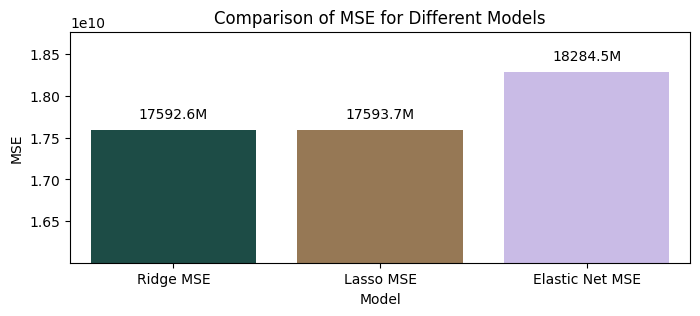

In [130]:
mse = np.array([store_mse['Ridge MSE'], store_mse['Lasso MSE'], store_mse['Elastic Net MSE']])
names = ['Ridge MSE', 'Lasso MSE', 'Elastic Net MSE']

# Create the bar plot
plt.figure(figsize=(8, 3))
sns.barplot(x=names, y=mse, palette = "cubehelix")  # Swap x and y
for i, value in enumerate(mse):
    plt.text(i, value + 1e8, f'{value/1e6:.1f}M', ha='center', va='bottom', fontsize=10)  # Adjust the offset and format as needed

plt.ylim([ 16005350576, 18763343292.810844])  # Set the limits for y-axis
plt.xlabel('Model')  # Label for x-axis
plt.ylabel('MSE')  # Label for y-axis
plt.title('Comparison of MSE for Different Models')  # Title of the plot
plt.show()

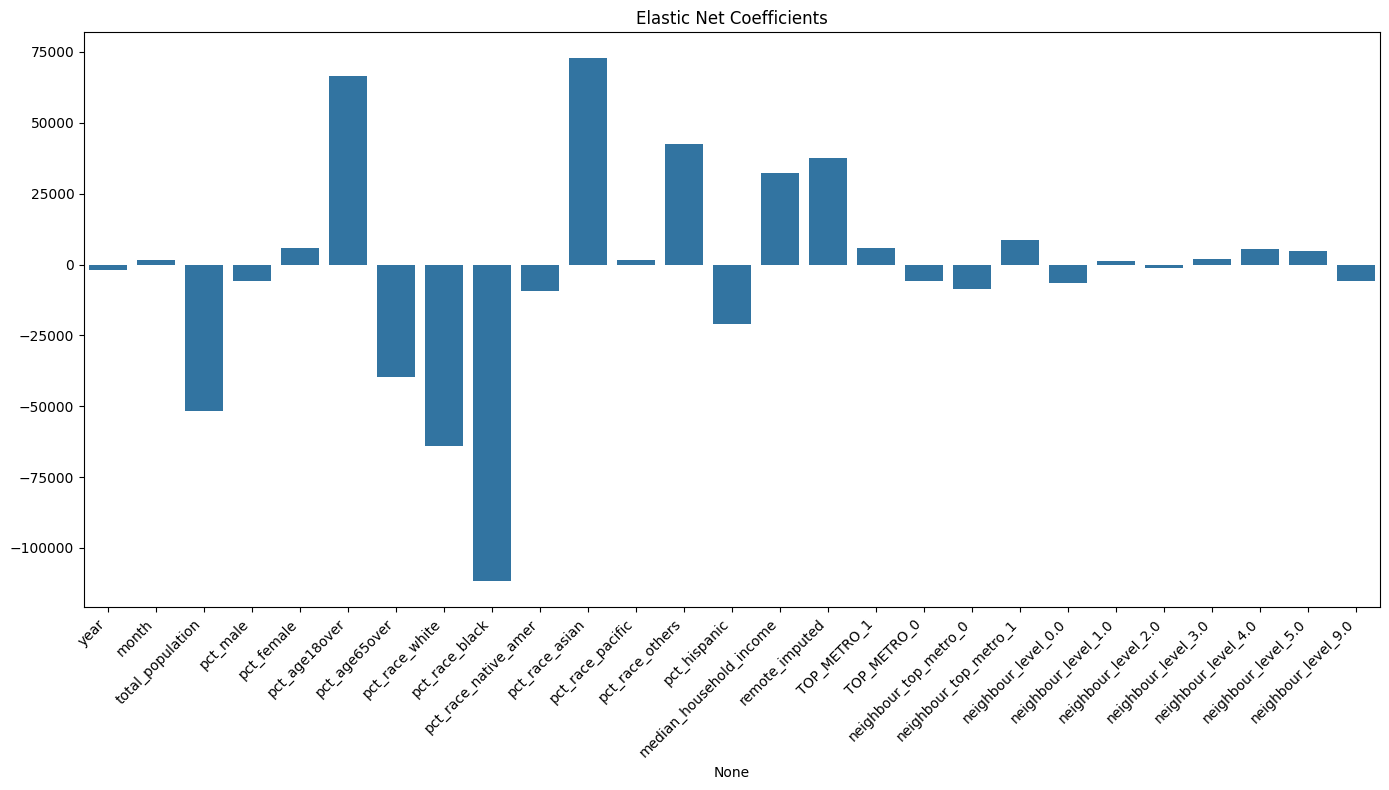

In [131]:
plt.figure(figsize=(14, 8))
sns.barplot(y=ela_net_coef, x= X_train_cols )

plt.title("Elastic Net Coefficients")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()


### Ridge has the best performance. We will predict end of 2024 with Elastic net

In [132]:
# Combine X_train + y_train to fit Elastic Net
full_training_X = pd.concat([X_train, X_test], axis=0)
full_training_y = pd.concat([y_train, y_test], axis=0)
full_dataset = full_training_X.copy()
full_dataset['y_label'] = full_training_y

In [133]:

print(full_training_X.shape)
print(full_training_y.shape)
# print(full_dataset.shape)

(343331, 27)
(343331,)


## ridge

In [134]:
#Ridge

ridge_final = Ridge(alpha=best_lmda)
ridge_final.fit(X_train, y_train)

# Get the coefficients
ridge_coefficients = ridge_final.coef_
print("Coefficients:")
print(ridge_coefficients)

# Predict on the test set
ridge_y_pred = ridge_final.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the test set
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
store_mse['Ridge MSE'] = ridge_mse
print("Ridge MSE: ", ridge_mse)


Coefficients:
[ 2.46517764e+03  1.69184119e+03 -1.77862277e+05 -6.60982223e+05
 -6.49405168e+05  6.56089663e+04 -4.17950971e+04 -1.42867164e+05
 -1.87156007e+05 -2.47363755e+04  5.12360043e+04  2.10578539e+03
  2.70660598e+04 -1.97536268e+04  1.58745875e+05  3.46732434e+04
  4.48296300e+03 -4.48296297e+03 -1.28444780e+04  1.28444783e+04
 -1.84704723e+04  3.09947114e+03  6.10203512e+02  4.26690810e+03
  7.77915070e+03  7.19971096e+03 -4.48335170e+03]
Ridge MSE:  17592608268.363075


In [135]:
# predict dec of 2024

predict_24 = X_test [X_test.month ==12]
predict_24.loc[:,'year'] = 2024
print(predict_24.year.unique())

[2024]


In [136]:
housing_price_2024 = ridge_final.predict(predict_24)
housing_price_2024.shape

(5929,)

In [137]:
fips_code = test_data[['county', 'year', 'FIPS_Code']]
fips_code.head(2)

,county,year,FIPS_Code
48,Abbeville County,2023,45001
49,Abbeville County,2023,45001


In [138]:
output = predict_24.copy()
output['housing_24_predicted'] = housing_price_2024
output['fips_code'] = test_data_processed['FIPS_Code']
output['county'] = test_data_processed['county']
output['state'] = test_data_processed['state']
output['housing_Dec23'] = y_test

output.head(3)

,year,month,total_population,pct_male,pct_female,pct_age18over,pct_age65over,pct_race_white,pct_race_black,pct_race_native_amer,...,neighbour_level_2.0,neighbour_level_3.0,neighbour_level_4.0,neighbour_level_5.0,neighbour_level_9.0,housing_24_predicted,fips_code,county,state,housing_Dec23
11,2024,12,-0.687262,-0.413889,0.413889,0.515738,1.104758,-0.028553,0.605924,-0.502895,...,0,0,0,0,1,118942.969752,45001,Abbeville County,SC,191463.099413
23,2024,12,-0.653452,0.064525,-0.064525,-1.488065,-0.460898,0.457401,0.060758,-0.267176,...,0,0,0,0,1,44293.763577,22001,Acadia Parish,LA,143038.896697
35,2024,12,-0.678127,-0.413889,0.413889,0.285793,1.789732,-0.243918,0.695787,-0.479323,...,0,0,0,0,1,131728.095943,51001,Accomack County,VA,230026.554252


In [139]:
output_reset = output.reset_index()


In [140]:
choose_index = output_reset['index'].unique()[500]
print(choose_index)

6462


In [141]:
#spot check if county is joined correctly
output_reset[output_reset['index'] == choose_index]

,index,year,month,total_population,pct_male,pct_female,pct_age18over,pct_age65over,pct_race_white,pct_race_black,...,neighbour_level_2.0,neighbour_level_3.0,neighbour_level_4.0,neighbour_level_5.0,neighbour_level_9.0,housing_24_predicted,fips_code,county,state,housing_Dec23
500,6462,2024,12,-0.030247,-0.094946,0.094946,0.515738,0.32193,0.026669,-0.777959,...,0,0,0,1,0,443007.877634,35001,Bernalillo County,NM,325378.398876


In [142]:
test_data_processed.iloc[choose_index,:]

index                                    40438
county                       Bernalillo County
year                                      2023
state                                       NM
FIPS_Code                                35001
date                       2023-12-31 00:00:00
total_population                     -0.030247
pct_male                             -0.094946
pct_female                            0.094946
pct_age18over                         0.515738
pct_age65over                          0.32193
pct_race_white                        0.026669
pct_race_black                       -0.777959
pct_race_native_amer                  1.076418
pct_race_asian                       -0.190712
pct_race_pacific                      0.027194
pct_race_others                       2.794321
pct_hispanic                           2.81811
median_household_income              -0.013834
remote_imputed                       -0.577402
home_price                       325378.398876
TOP_METRO_0  

In [143]:
output_reset.shape

(5929, 33)

In [144]:
len(output_reset.fips_code.unique())

1987

In [145]:
ct = output_reset[output_reset.state == 'CT']

In [146]:
output_aggregated = output_reset.groupby(['state', 'county', 'fips_code']).mean()
output_aggregated = output_aggregated.reset_index()

In [147]:
# check if there are duplicates for county
output_aggregated[output_aggregated.state == 'CT'].sort_values("county", ascending = False).head(10)

,state,county,fips_code,index,year,month,total_population,pct_male,pct_female,pct_age18over,...,neighbour_top_metro_1,neighbour_level_0.0,neighbour_level_1.0,neighbour_level_2.0,neighbour_level_3.0,neighbour_level_4.0,neighbour_level_5.0,neighbour_level_9.0,housing_24_predicted,housing_Dec23
215,CT,Windham County,9015,70498.0,2024.0,12.0,-0.665448,-0.041789,0.041789,1.435516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,274744.826601,321935.704001
214,CT,Tolland County,9013,66587.0,2024.0,12.0,-0.558767,0.330311,-0.330311,1.336968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,409550.345215,350606.963436
213,CT,New London County,9011,48502.0,2024.0,12.0,-0.441091,0.330311,-0.330311,0.614285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,311774.038535,366422.820622
212,CT,New Haven County,9009,48478.0,2024.0,12.0,0.156688,-0.679675,0.679675,0.384341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,305599.631015,351901.098014
211,CT,Middlesex County,9007,45477.0,2024.0,12.0,0.164697,0.117683,-0.117683,0.055848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,735400.811274,402440.501961
210,CT,Litchfield County,9005,40397.0,2024.0,12.0,-0.528114,-0.041789,0.041789,1.041325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,296117.617049,373916.471542
209,CT,Hartford County,9003,28683.0,2024.0,12.0,0.193659,-0.467047,0.467047,0.121547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,310926.435984,330444.983085


In [148]:
filter_fips = list(adjacency.neighbour_county_fips)
output_aggregated = output_aggregated[output_aggregated['fips_code'].isin(filter_fips)]
output_aggregated = pd.concat([output_aggregated, ct], ignore_index=True)

output_aggregated.shape

(1505, 33)

In [149]:
output_aggregated['housing_pct_increase_24'] = (output_aggregated['housing_24_predicted']-output_aggregated['housing_Dec23'])/output_aggregated['housing_Dec23']
top_increase_by_state_v2 = output_aggregated.loc[output_aggregated.groupby('state')['housing_pct_increase_24'].idxmax()]
top_increase_by_state_v2

,state,county,fips_code,index,year,month,total_population,pct_male,pct_female,pct_age18over,...,neighbour_level_0.0,neighbour_level_1.0,neighbour_level_2.0,neighbour_level_3.0,neighbour_level_4.0,neighbour_level_5.0,neighbour_level_9.0,housing_24_predicted,housing_Dec23,housing_pct_increase_24
18,AL,Pickens County,1107,53962.0,2024.0,12.0,-0.574453,0.064525,-0.064525,1.008476,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,268477.626400,129147.451075,1.078846
61,AR,Yell County,5149,70955.0,2024.0,12.0,-0.691349,0.649255,-0.649255,-0.798231,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,293442.161124,143650.997587,1.042744
73,AZ,Santa Cruz County,4023,64245.0,2024.0,12.0,-0.446493,0.330311,-0.330311,1.139873,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,565651.666398,264845.851882,1.135777
88,CA,Imperial County,6025,30305.0,2024.0,12.0,-0.530232,0.649255,-0.649255,-2.177899,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,588234.455498,331379.456073,0.775108
141,CO,Crowley County,8025,14410.0,2024.0,12.0,-0.706130,9.739136,-9.739136,2.256747,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,416575.177315,149703.771370,1.782663
1500,CT,Middlesex County,9007,45477.0,2024.0,12.0,0.164697,0.117683,-0.117683,0.055848,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,735400.811274,402440.501961,0.827353
186,DC,District of Columbia,11001,22695.0,2024.0,12.0,-0.022749,-1.104933,1.104933,0.909928,...,0.010753,0.043011,0.086022,0.204301,0.311828,0.344086,0.0,445747.163025,614221.484965,-0.274289
187,DE,Kent County,10001,36579.0,2024.0,12.0,-0.519337,-0.839147,0.839147,-0.404041,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,149149.010667,343444.952214,-0.565727
204,FL,Osceola County,12097,51908.0,2024.0,12.0,-0.267588,0.011368,-0.011368,-0.765382,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,469279.290861,380507.693527,0.233298
214,GA,Chattahoochee County,13053,10642.0,2024.0,12.0,-0.702455,8.144420,-8.144420,-0.206945,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,307176.512295,109959.259663,1.793548


## final dataset  
FIPS_Code |  state | county | neighborhood_label | 1 county per state highest growth | pct_growth_from_ly (predicted variable) | predicted_housing_price 
- final output will have 48 rows (1 row per state)

- 2 datsets
- all outputs
- window function for 1st rank only per state

In [150]:
output_cols = ['year', 'month', 'fips_code', 'state', 'county','housing_Dec23', 
               'housing_24_predicted',  'housing_pct_increase_24',
               'total_population', 'pct_male', 'pct_female',
       'pct_age18over', 'pct_age65over', 'pct_race_white', 'pct_race_black',
       'pct_race_native_amer', 'pct_race_asian', 'pct_race_pacific',
       'pct_race_others', 'pct_hispanic', 'median_household_income',
       'remote_imputed', 'TOP_METRO_1', 'TOP_METRO_0'
       ]
top_increase_by_state_v2[output_cols].head(2)

,year,month,fips_code,state,county,housing_Dec23,housing_24_predicted,housing_pct_increase_24,total_population,pct_male,...,pct_race_black,pct_race_native_amer,pct_race_asian,pct_race_pacific,pct_race_others,pct_hispanic,median_household_income,remote_imputed,TOP_METRO_1,TOP_METRO_0
18,2024.0,12.0,1107,AL,Pickens County,129147.451075,268477.626400,1.078846,-0.574453,0.064525,...,-0.646160,-0.196461,-0.520684,0.027194,-0.720198,-0.716415,-0.595381,-1.334504,0.0,1.0
61,2024.0,12.0,5149,AR,Yell County,143650.997587,293442.161124,1.042744,-0.691349,0.649255,...,-0.903766,-0.290748,-0.659619,-0.305123,0.635886,0.548232,-0.712656,-1.349716,0.0,1.0


In [151]:
top_increase_by_state_v2

,state,county,fips_code,index,year,month,total_population,pct_male,pct_female,pct_age18over,...,neighbour_level_0.0,neighbour_level_1.0,neighbour_level_2.0,neighbour_level_3.0,neighbour_level_4.0,neighbour_level_5.0,neighbour_level_9.0,housing_24_predicted,housing_Dec23,housing_pct_increase_24
18,AL,Pickens County,1107,53962.0,2024.0,12.0,-0.574453,0.064525,-0.064525,1.008476,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,268477.626400,129147.451075,1.078846
61,AR,Yell County,5149,70955.0,2024.0,12.0,-0.691349,0.649255,-0.649255,-0.798231,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,293442.161124,143650.997587,1.042744
73,AZ,Santa Cruz County,4023,64245.0,2024.0,12.0,-0.446493,0.330311,-0.330311,1.139873,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,565651.666398,264845.851882,1.135777
88,CA,Imperial County,6025,30305.0,2024.0,12.0,-0.530232,0.649255,-0.649255,-2.177899,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,588234.455498,331379.456073,0.775108
141,CO,Crowley County,8025,14410.0,2024.0,12.0,-0.706130,9.739136,-9.739136,2.256747,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,416575.177315,149703.771370,1.782663
1500,CT,Middlesex County,9007,45477.0,2024.0,12.0,0.164697,0.117683,-0.117683,0.055848,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,735400.811274,402440.501961,0.827353
186,DC,District of Columbia,11001,22695.0,2024.0,12.0,-0.022749,-1.104933,1.104933,0.909928,...,0.010753,0.043011,0.086022,0.204301,0.311828,0.344086,0.0,445747.163025,614221.484965,-0.274289
187,DE,Kent County,10001,36579.0,2024.0,12.0,-0.519337,-0.839147,0.839147,-0.404041,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,149149.010667,343444.952214,-0.565727
204,FL,Osceola County,12097,51908.0,2024.0,12.0,-0.267588,0.011368,-0.011368,-0.765382,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,469279.290861,380507.693527,0.233298
214,GA,Chattahoochee County,13053,10642.0,2024.0,12.0,-0.702455,8.144420,-8.144420,-0.206945,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,307176.512295,109959.259663,1.793548


In [152]:
output.head(2)

,year,month,total_population,pct_male,pct_female,pct_age18over,pct_age65over,pct_race_white,pct_race_black,pct_race_native_amer,...,neighbour_level_2.0,neighbour_level_3.0,neighbour_level_4.0,neighbour_level_5.0,neighbour_level_9.0,housing_24_predicted,fips_code,county,state,housing_Dec23
11,2024,12,-0.687262,-0.413889,0.413889,0.515738,1.104758,-0.028553,0.605924,-0.502895,...,0,0,0,0,1,118942.969752,45001,Abbeville County,SC,191463.099413
23,2024,12,-0.653452,0.064525,-0.064525,-1.488065,-0.460898,0.457401,0.060758,-0.267176,...,0,0,0,0,1,44293.763577,22001,Acadia Parish,LA,143038.896697


In [153]:
top_increase_by_state_v2.to_csv('./Tableau/Datasources/top_increase_by_state_v2.csv', index=False)
output.to_csv(data_path+'prediction_raw.csv', index=False)